In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0,'/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/')
sys.path

['/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/',
 '/afs/cern.ch/user/a/anpotreb/top/JERC/JMECoffea',
 '/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Fri/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk',
 '/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Fri/x86_64-centos7-gcc11-opt/python',
 '/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Fri/x86_64-centos7-gcc11-opt/lib',
 '',
 '/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Fri/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload',
 '/afs/cern.ch/user/a/anpotreb/.local/lib/python3.9/site-packages',
 '/afs/cern.ch/user/a/anpotreb/.local/lib/python3.9/site-packages/UNKNOWN-0.0.0-py3.9.egg',
 '/afs/cern.ch/user/a/anpotreb/top/JERC/coffea',
 '/cv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
from coffea import util
from make_comparison_plot import make_comparison_plot

/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [4]:
from pltStyle import pltStyle
from scipy.interpolate import CubicSpline
pltStyle(style='paper')
plt.rcParams['figure.subplot.left'] = 0.162
plt.rcParams['figure.dpi'] = 150

In [5]:
plt.rcParams['figure.figsize'] = [3.6, 3.3]  #Latex text width =0.7*page width = 8.2 inches
#        plt.rcParams['figure.subplot.wspace'] = 0.33
plt.rcParams['figure.subplot.top'] = 0.87
plt.rcParams['figure.subplot.bottom'] = 0.16
plt.rcParams['figure.subplot.right'] = 0.97
plt.rcParams['figure.subplot.left'] = 0.15
# plt.rcParams['axes.prop_cycle'] = cols_cyc

In [6]:
### Some recent file to get out the binning
outname = 'out/CoffeaJERCOutputs_L5_fine_etaBins_QCD.coffea'
output = util.load(outname)

f_xvals = np.linspace(0,5,5001)

ptbins = output['ptresponse'].axis('pt').edges()
ptbins_c = output['ptresponse'].axis('pt').centers()
etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5,
                    -2.322,  -1.93, -1.653, -1.305, -0.783,      
                    0,  0.783,  1.305,  1.653,   1.93,  2.322, 2.5, 
                    2.853,  3.139,  3.489, 5.191])
etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
    

# jetpt_length = len(ptbins)-1
# jeteta_length = (len(etabins)-1)//2

etabins_mod = etabins[(len(etabins)-1)//2:]
etabins_c = (etabins_mod[:-1]+etabins_mod[1:])/2 #output['ptresponse'].axis('jeteta').centers()

In [7]:
def read_data(name, samp, tag_full):
    df_csv = pd.read_csv('out_txt/EtaBinsvsPtBins'+name+'_'+samp+tag_full+'.csv').set_index('etaBins')
    data = df_csv.to_numpy().transpose()
    return data

In [8]:
# df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
# closure_corr = df_csv.to_numpy().transpose()

# # load_fit_res=True
# # subsamples = ['_b', '_c', '_d', '_u', '_s', '_g', '_bbar', '_cbar', '_ubar', '_dbar', '_sbar', '_all']
# # subsamples = ['b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar', 'all']
# subsamples = ['b', 'c']
# # subsamples = ['']

# k2 = np.where(etabins_mod<=0)[0][-1]
# k4 = np.where(etabins_mod<=1.3)[0][-1]
# k6 = np.where(etabins_mod<=2.5)[0][-1]
# k8 = np.where(etabins_mod<=3.0)[0][-1]
# ks = [k2, k4, k6, k8]

# tag1 = '_L5_QCD-JME'
# tag2 = '_L5_QCD-JME'
# # ks = [k2]
# # ks = [2]

# # ks = [k2, k4] #, k6, k8]
# # subsamples = [''] #, '_b']
# for samp in subsamples:
#     median_1 = read_data("Median", samp, tag1)
#     medianstd_1 = read_data("MedianStd", samp, tag1)
#     median_2 = read_data("Median", samp, tag2)/closure_corr
#     medianstd_2 = read_data("MedianStd", samp, tag2)
        
# #         pt_reco_1 = read_data("MeanRecoPt_", 'b', tag1)
# #         pt_reco_2 = read_data("MeanRecoPt_", 'b', tag1)
#     data = {
#         "noclosure": [median_1, medianstd_1, ptbins_c],
# #             "No_closure": [median2, medianstd2, reco_pt],
#         "closure": [median_2, medianstd_2, ptbins_c],
#        }

#     for k in ks:
#         print('Fitting subsample: ', samp)
#         print('Eta: ', k)
        
#         make_comparison_plot(data, 
#                           {},
#                           etaidx=k, samp=samp, ratio_name='*/ \n closure')
# #         make_comparison_plot(data, None,
# #                              k, samp, "1/closure")
        
# 3;

In [9]:
def read_data2(name, samp, tag_full):
    df_csv = pd.read_csv('test/out_txt/EtaBinsvsPtBins'+name+'_'+samp+tag_full+'.csv').set_index('etaBins')
    data = df_csv.to_numpy().transpose()
    return data

In [10]:
df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
closure_corr = df_csv.to_numpy().transpose()

In [11]:
# median_2[:,0]
# median_base[:,0]

# reco_pt[:,0]
# reco_pt2[:,0]
# ptbins_c

In [12]:
# (read_data(mean_name, 'b', tag4)/closure_4)[:,0]
# (read_data("MeanRecoPt", 'b', tag4)/closure_4)[:,0]
# (read_data(mean_name_std, 'b', tag4)/closure_4)[:,0]
# ptbins_c

In [13]:
# median_5
# median_base
# median_2

In [14]:
# closure_Py
# closure_Her

In [15]:
# median_base[:,0]
# closure_Py[:,0]
# read_data(mean_name, 'g', tag1)[:,0]
# # closure_Py[:,0]
# samp

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  all
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_all_eta00to13_L5_Py8--median


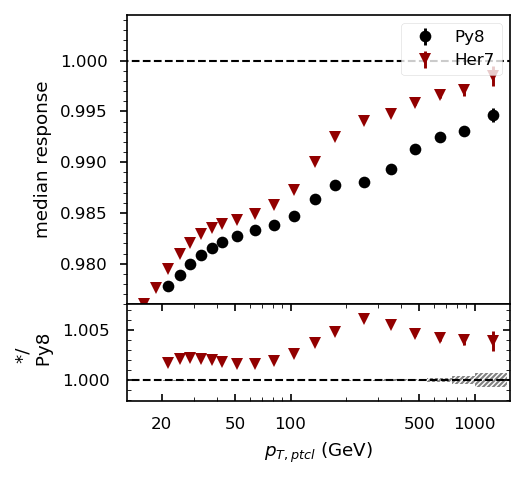

Fitting subsample:  all
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_all_eta13to25_L5_Py8--median


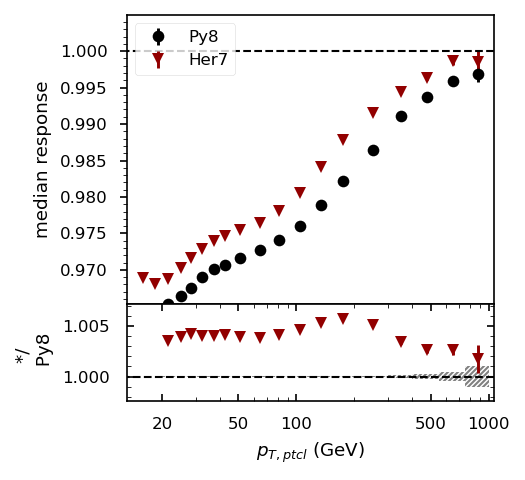

Fitting subsample:  all
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_all_eta25to30_L5_Py8--median


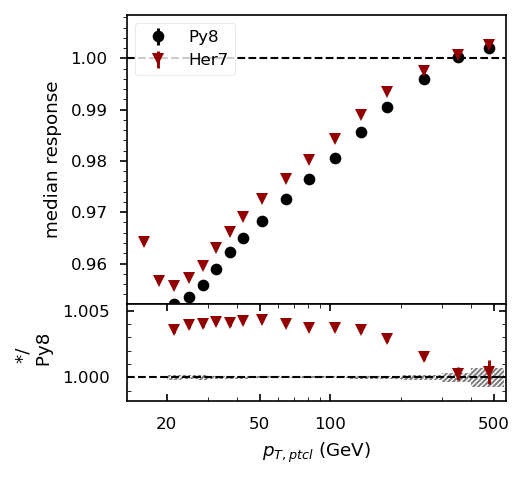

Fitting subsample:  all
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_all_eta30to50_L5_Py8--median


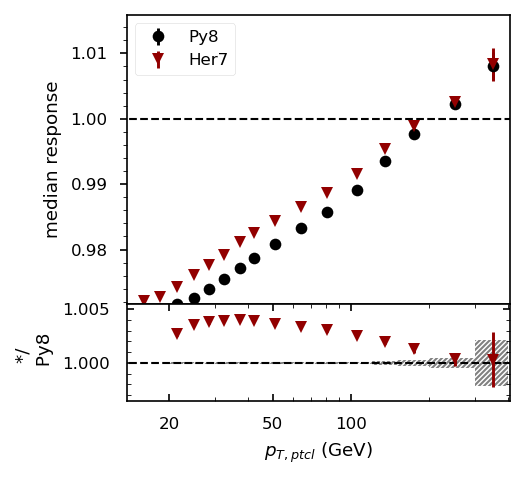

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  b
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_b_eta00to13_L5_Py8--median


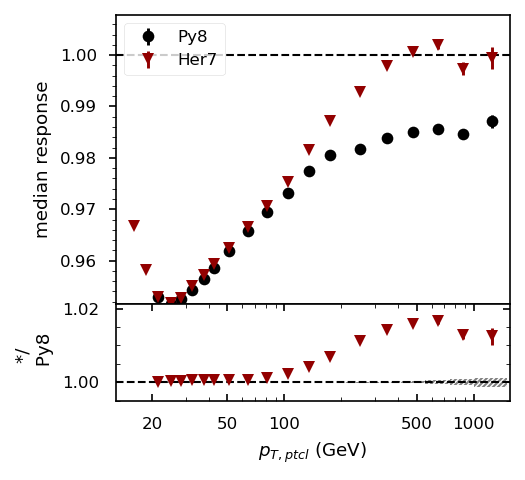

Fitting subsample:  b
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_b_eta13to25_L5_Py8--median


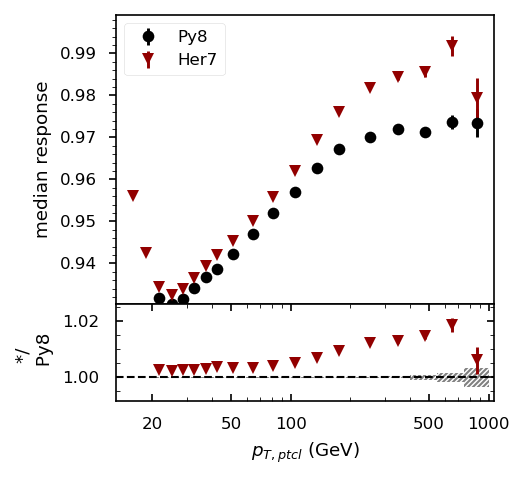

Fitting subsample:  b
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_b_eta25to30_L5_Py8--median


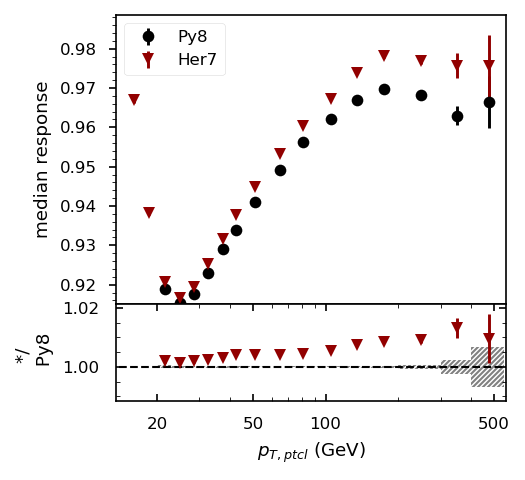

Fitting subsample:  b
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_b_eta30to50_L5_Py8--median


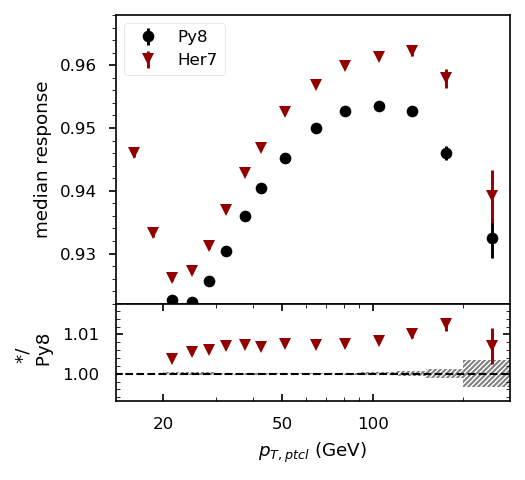

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  c
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_c_eta00to13_L5_Py8--median


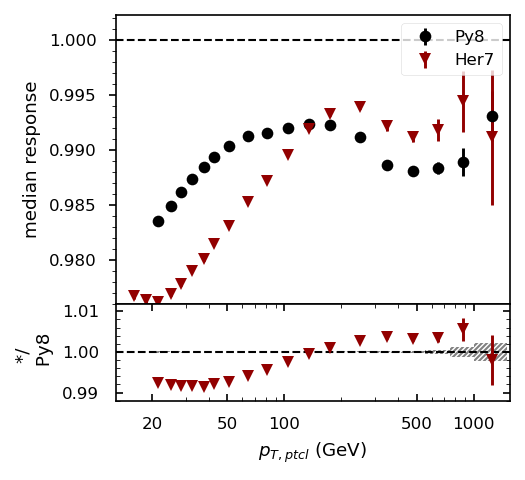

Fitting subsample:  c
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_c_eta13to25_L5_Py8--median


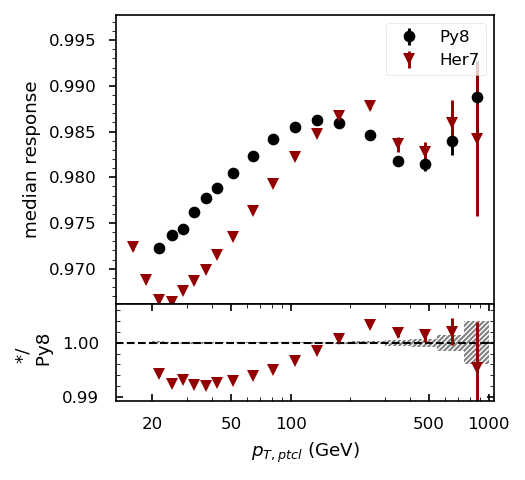

Fitting subsample:  c
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_c_eta25to30_L5_Py8--median


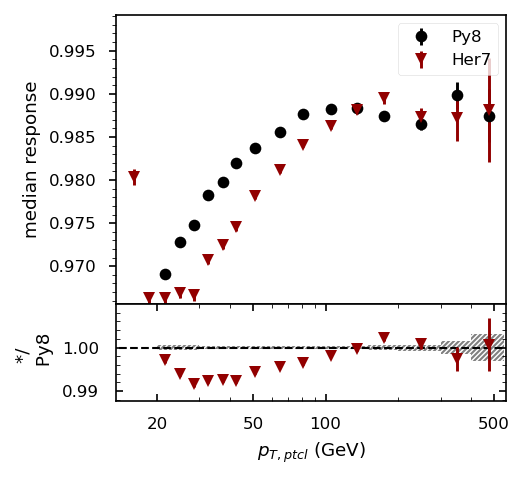

Fitting subsample:  c
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_c_eta30to50_L5_Py8--median


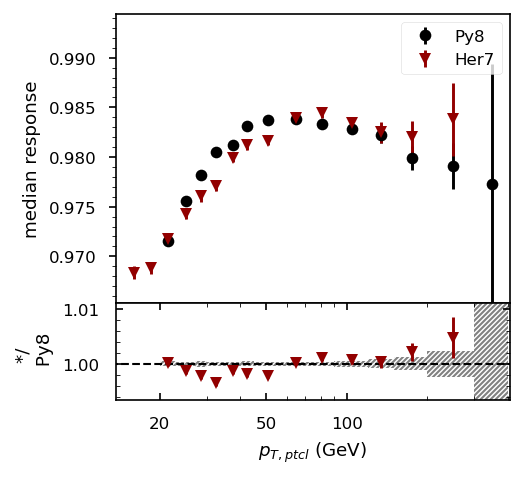

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  d
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_d_eta00to13_L5_Py8--median


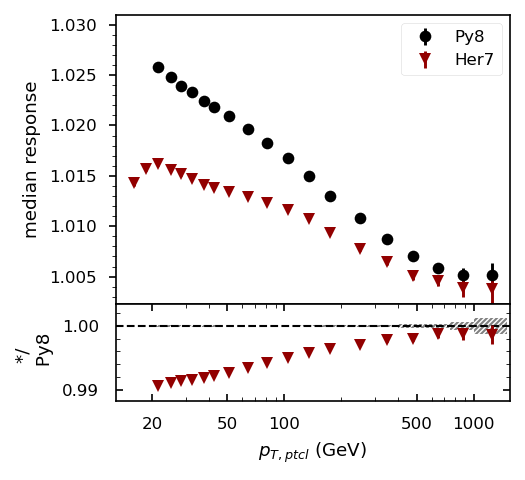

Fitting subsample:  d
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_d_eta13to25_L5_Py8--median


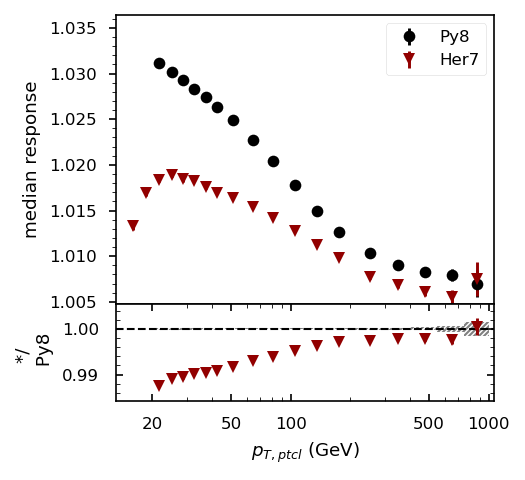

Fitting subsample:  d
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_d_eta25to30_L5_Py8--median


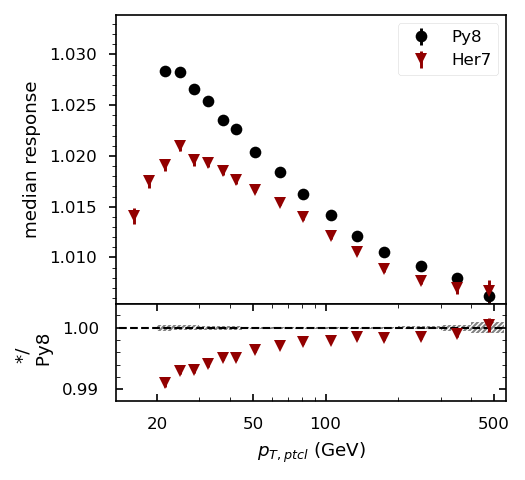

Fitting subsample:  d
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_d_eta30to50_L5_Py8--median


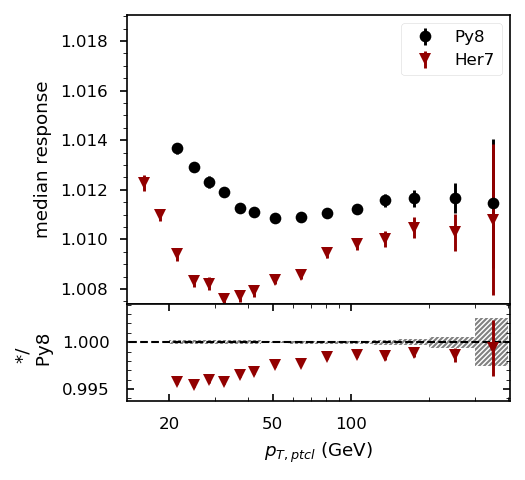

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  u
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_u_eta00to13_L5_Py8--median


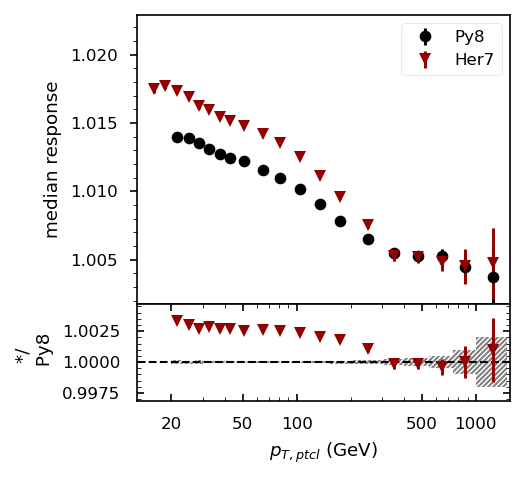

Fitting subsample:  u
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_u_eta13to25_L5_Py8--median


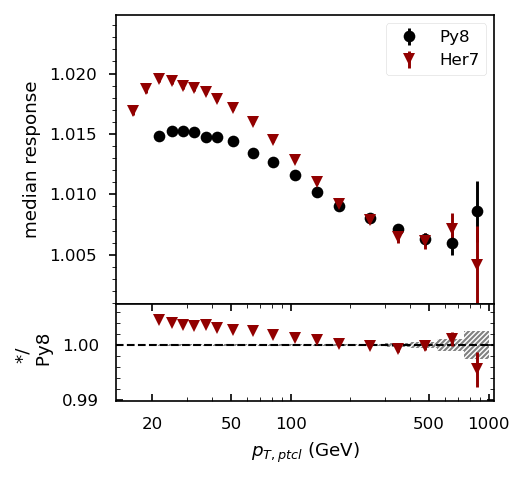

Fitting subsample:  u
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_u_eta25to30_L5_Py8--median


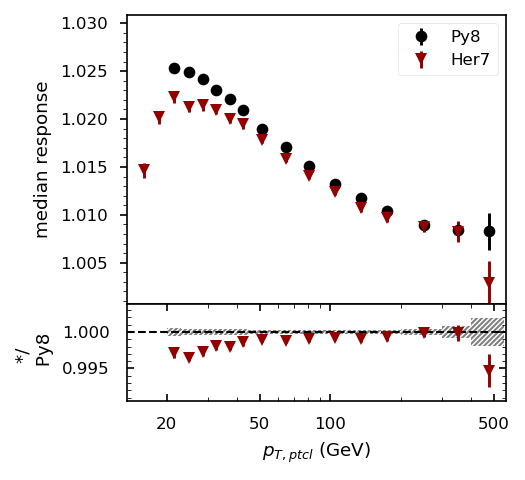

Fitting subsample:  u
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_u_eta30to50_L5_Py8--median


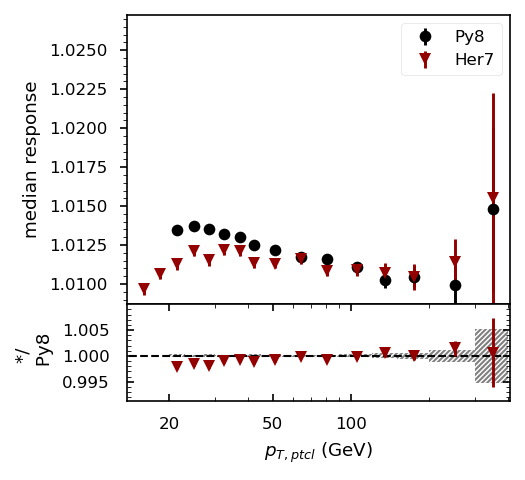

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  s
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_s_eta00to13_L5_Py8--median


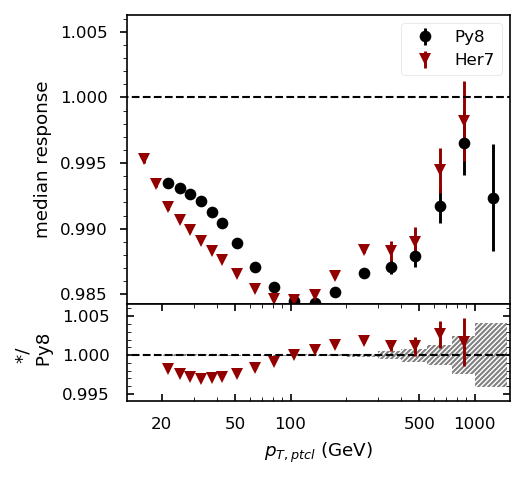

Fitting subsample:  s
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_s_eta13to25_L5_Py8--median


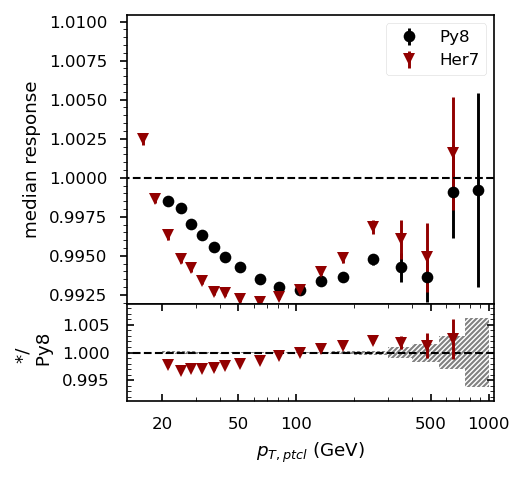

Fitting subsample:  s
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_s_eta25to30_L5_Py8--median


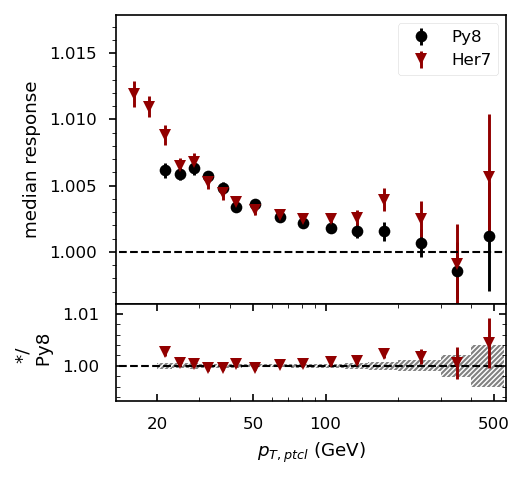

Fitting subsample:  s
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_s_eta30to50_L5_Py8--median


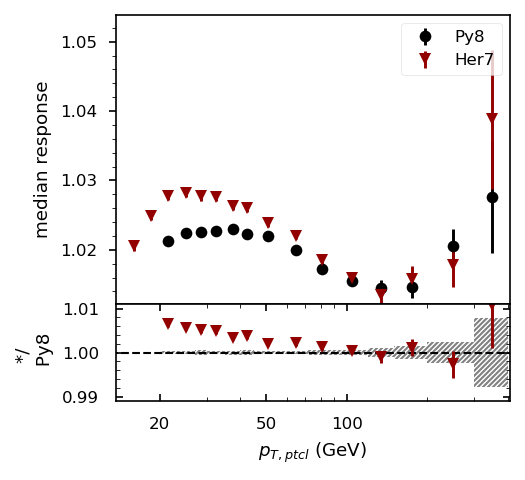

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  g
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_g_eta00to13_L5_Py8--median


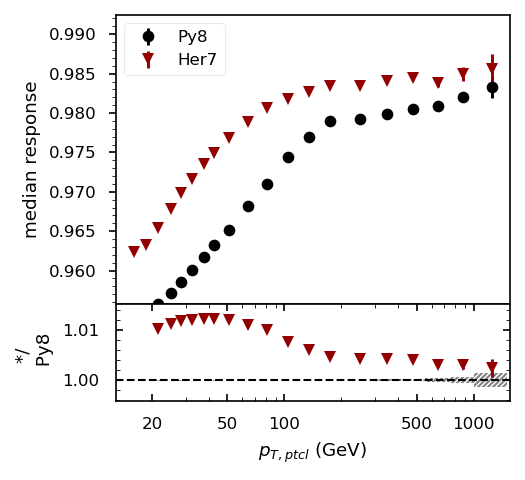

Fitting subsample:  g
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_g_eta13to25_L5_Py8--median


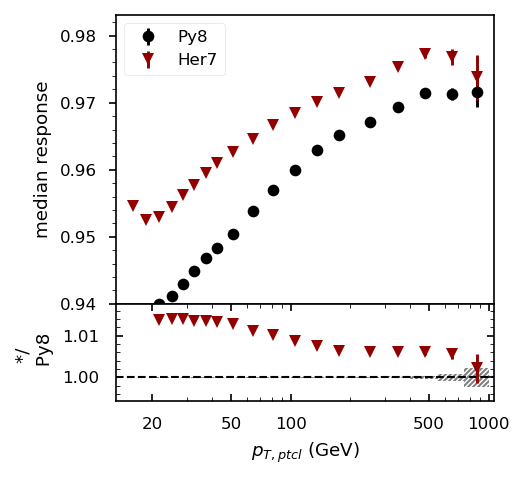

Fitting subsample:  g
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_g_eta25to30_L5_Py8--median


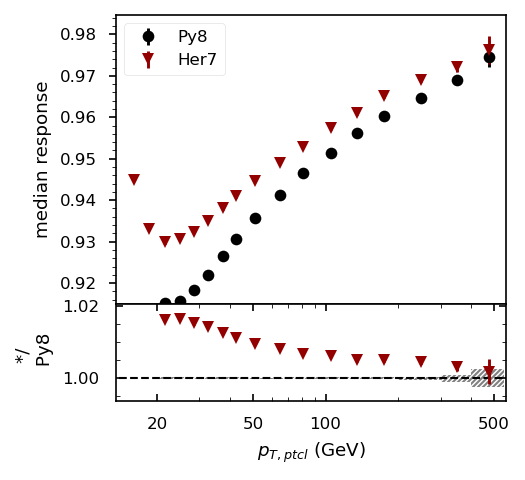

Fitting subsample:  g
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_g_eta30to50_L5_Py8--median


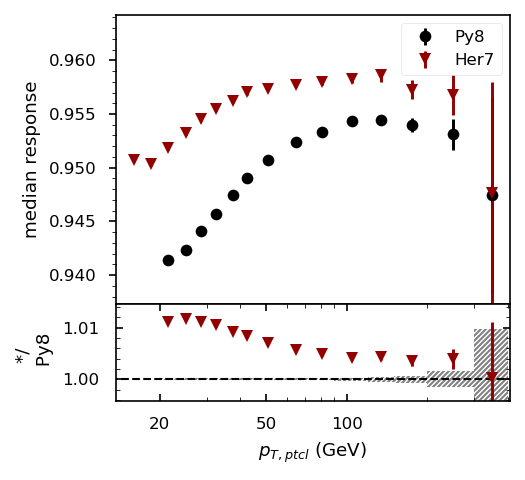

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  ud
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_ud_eta00to13_L5_Py8--median


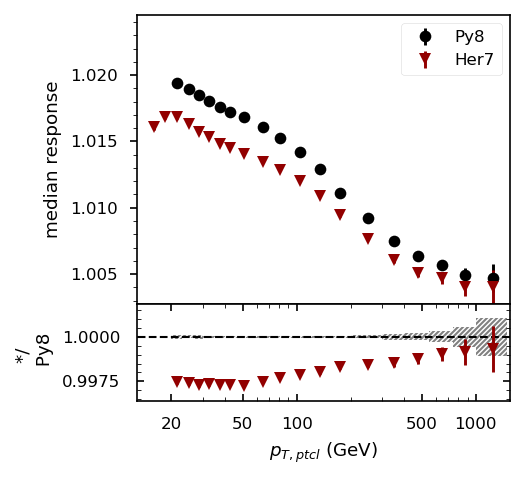

Fitting subsample:  ud
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_ud_eta13to25_L5_Py8--median


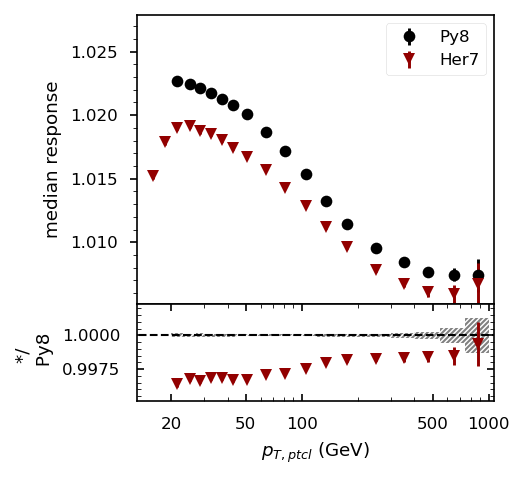

Fitting subsample:  ud
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_ud_eta25to30_L5_Py8--median


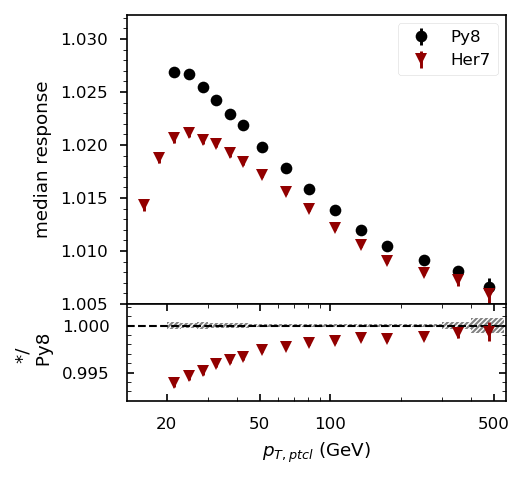

Fitting subsample:  ud
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_ud_eta30to50_L5_Py8--median


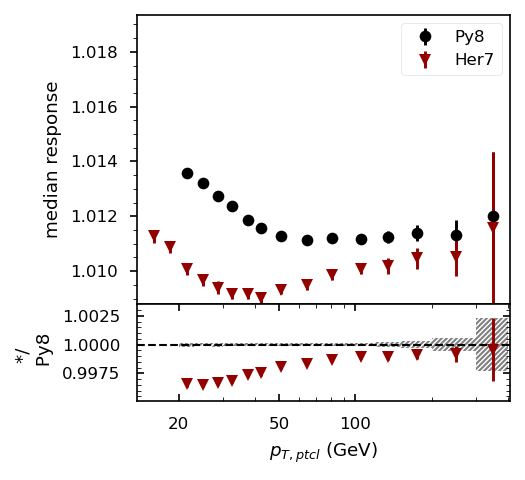

/tmp/anpotreb/ipykernel_2323/3394601090.py:51: RuntimeWarning: invalid value encountered in true_divide
  median_3 = read_data(mean_name, samp, tag2)/closure_Her


Fitting subsample:  q
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_q_eta00to13_L5_Py8--median


In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'untagged']
# subsamples = ['ud', 'all']
# subsamples = ['all', 'b']
tag1 = '_L5_TTBAR-JME'
tag2 = '_L5_Herwig-TTBAR'
# tag3 = '_L5_QCD-JME-leading3jets'
# tag4 = '_L5_QCD-JME-weights-leading3jets'
# tag5 = '_L5_Herwig-QCD'
# tag3 = '_L5_QCD-divided'

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Py = read_data(mean_name, 'q', tag1)*0.8+read_data(mean_name, 'g', tag1)*0.2
closure_Py[( read_data(mean_name, 'q', tag1)==0 ) | (read_data(mean_name, 'g', tag1)==0)] = np.nan
closure_Her = read_data(mean_name, 'q', tag2)*0.8 + read_data(mean_name, 'g', tag2)*0.2
closure_Her[( read_data(mean_name, 'q', tag2)==0 ) | (read_data(mean_name, 'g', tag2)==0)] = np.nan
# closure_2 = read_data(mean_name, 'all', tag2)
# closure_3 = read_data(mean_name, 'all', tag3)
# closure_4 = read_data(mean_name, 'all', tag4)
# closure_Her = read_data(mean_name, 'all', tag5)

# k2 = np.where(etabins_mod<=0)[0][-1]
# k4 = np.where(etabins_mod<=1.3)[0][-1]
# k6 = np.where(etabins_mod<=2.5)[0][-1]
# k8 = np.where(etabins_mod<=3.0)[0][-1]
# ks = [k2, k4, k6, k8]
# closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
# closure_Aut18_Her = evaluator['Autumn18_V3_MC_Herwig7_all_L2Relative_AK4PFchs']

# def closure_Aut18(pt,eta):
#     return 0.8*evaluator['Autumn18_V3_MC_Pythia8_ud_L2Relative_AK4PFchs'](pt, eta) + 0.2*evaluator['Autumn18_V3_MC_Pythia8_g_L2Relative_AK4PFchs'](pt, eta)
# def closure_Aut18_Her(pt,eta):
#     return 0.8*evaluator['Autumn18_V3_MC_Herwig7_ud_L2Relative_AK4PFchs'](pt, eta) + 0.2*evaluator['Autumn18_V3_MC_Herwig7_g_L2Relative_AK4PFchs'](pt, eta)



# ks = [k2, k4] #, k6, k8]
for samp in subsamples:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' else '_'+samp_Aut18
    median_base = read_data(mean_name, samp, tag1)/closure_Py #[2:]
    medianstd_base = read_data(mean_name_std, samp, tag1) #[2:]
    reco_pt = read_data("MeanRecoPt", samp, tag1)
#     median_2 = read_data(mean_name, samp, tag2)/closure_Py
#     medianstd_2 = read_data(mean_name_std, samp, tag2)
#     reco_pt2 = read_data("MeanRecoPt", samp, tag2)
    median_3 = read_data(mean_name, samp, tag2)/closure_Her
    medianstd_3 = read_data(mean_name_std, samp, tag2)
    reco_pt3 = read_data("MeanRecoPt", samp, tag2)
#     median_3 = read_data(mean_name, samp, tag3)/closure_3
#     medianstd_3 = read_data(mean_name_std, samp, tag3)
#     reco_pt3 = read_data("MeanRecoPt", samp, tag3)
#     median_4 = read_data(mean_name, samp, tag4)/closure_4
#     medianstd_4 = read_data(mean_name_std, samp, tag4)
#     reco_pt4 = read_data("MeanRecoPt", samp, tag4)
#     median_5 = read_data(mean_name, samp, tag5)/closure_1
#     medianstd_5 = read_data(mean_name_std, samp, tag5)
#     reco_pt5 = read_data("MeanRecoPt", samp, tag5)
    data = {
        "Py8": [median_base, medianstd_base, reco_pt],
#         "Her7/ Py8 all": [median_2, medianstd_2, reco_pt2],
        "Her7": [median_3, medianstd_3, reco_pt3],
#         "divided": [median_3, medianstd_3, ptbins_c],
       }
    
#     evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
    
#     functions = {
#             "Autumn18_Py":    [evo, closure_Aut18],
#             "Autumn18_Her":   [evo_Her, closure_Aut18_Her],
# #             "Autumn18_Her_Her":   [evo_Her, closure_Aut18_Her],
            
#            }

    for k in range(len(etabins_mod)-1):
        print('Fitting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median_base[:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etaidx=k, samp=samp, ratio_name='*/ \n Py8')
        
3;

Fitting subsample:  b
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_b_eta00to13_L5_Pythia--median


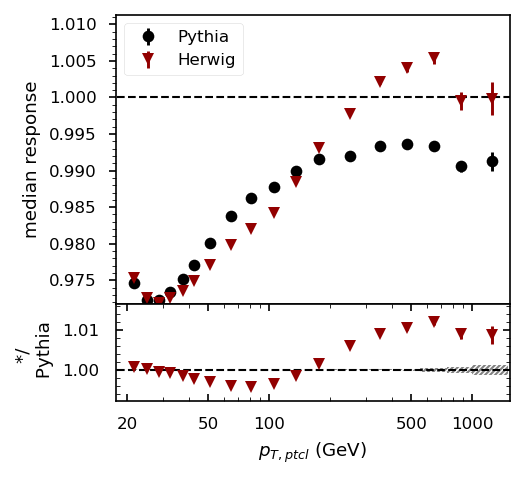

Fitting subsample:  b
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_b_eta13to25_L5_Pythia--median


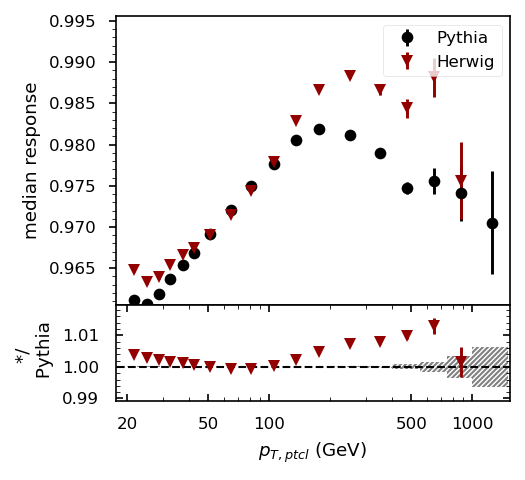

Fitting subsample:  b
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_b_eta25to30_L5_Pythia--median


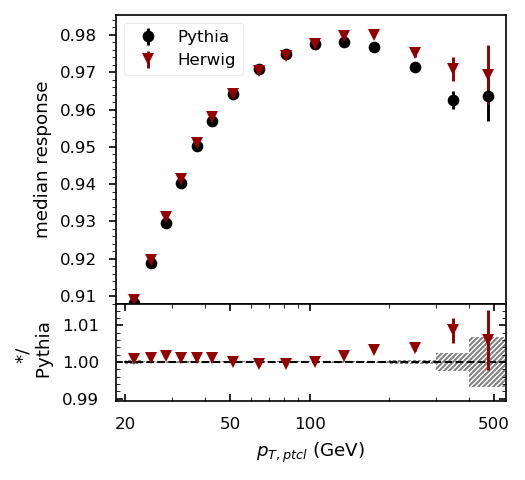

Fitting subsample:  b
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_b_eta30to50_L5_Pythia--median


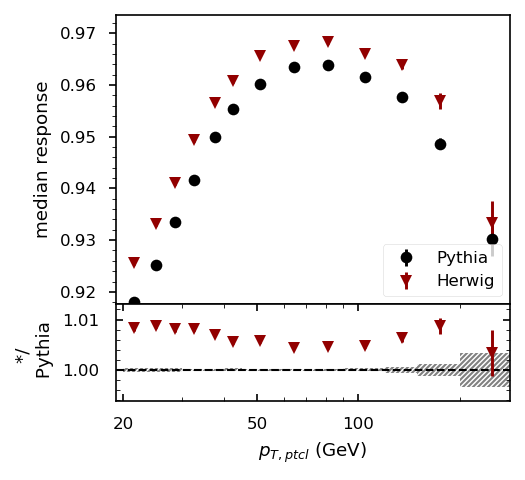

Fitting subsample:  c
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_c_eta00to13_L5_Pythia--median


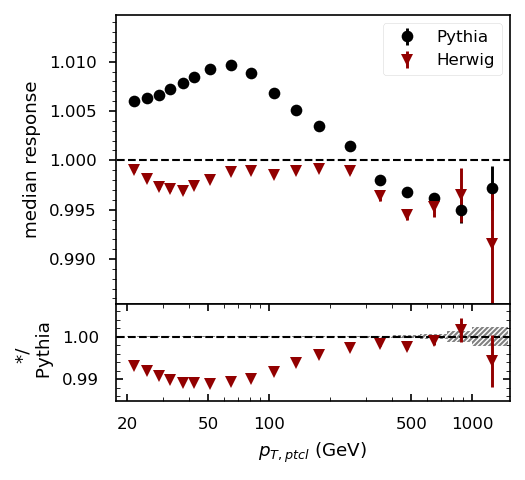

Fitting subsample:  c
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_c_eta13to25_L5_Pythia--median


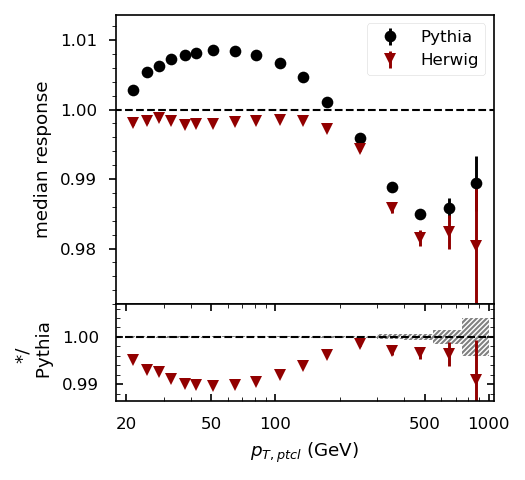

Fitting subsample:  c
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_c_eta25to30_L5_Pythia--median


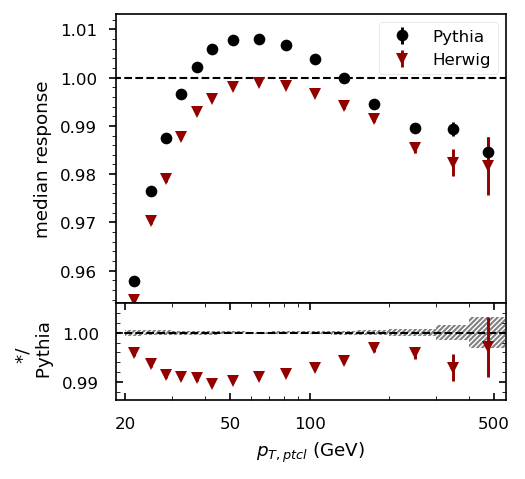

Fitting subsample:  c
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_c_eta30to50_L5_Pythia--median


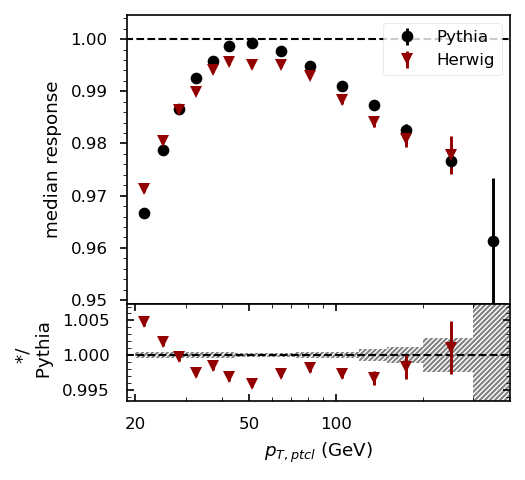

Fitting subsample:  d
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_d_eta00to13_L5_Pythia--median


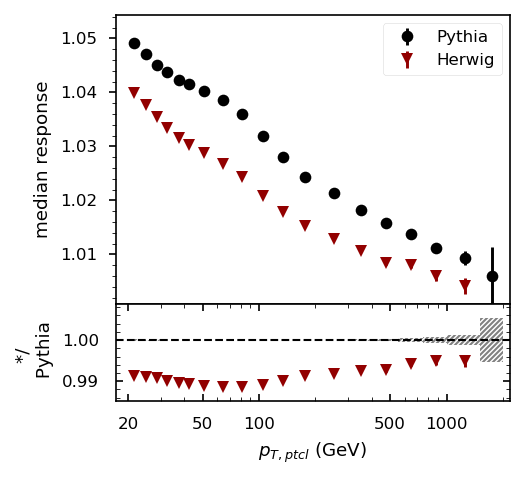

Fitting subsample:  d
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_d_eta13to25_L5_Pythia--median


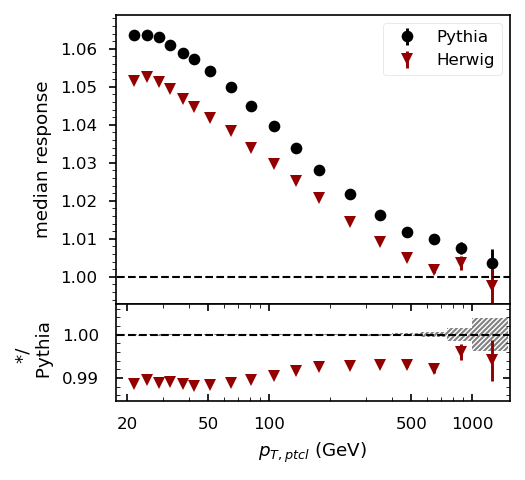

Fitting subsample:  d
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_d_eta25to30_L5_Pythia--median


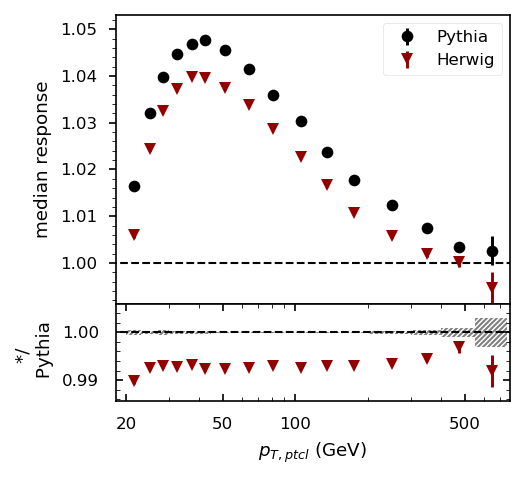

Fitting subsample:  d
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_d_eta30to50_L5_Pythia--median


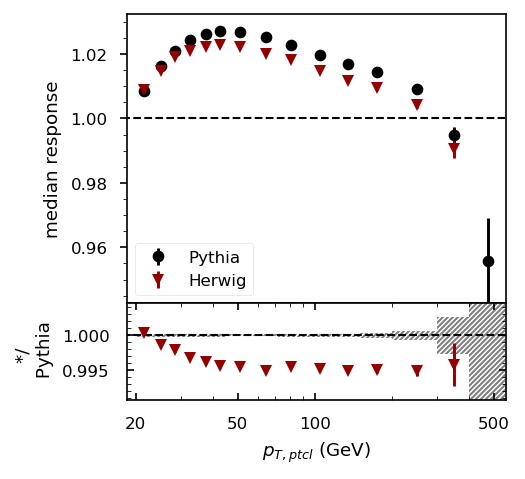

Fitting subsample:  u
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_u_eta00to13_L5_Pythia--median


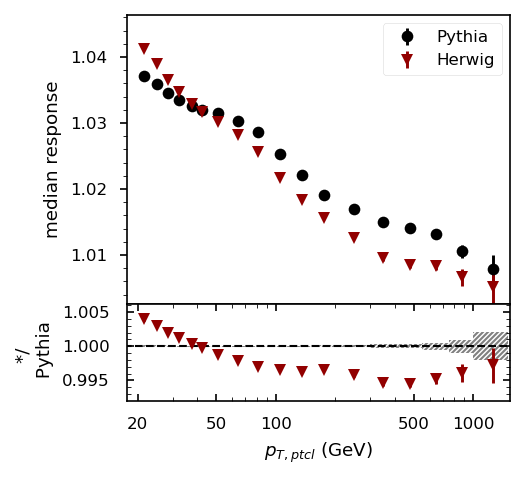

Fitting subsample:  u
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_u_eta13to25_L5_Pythia--median


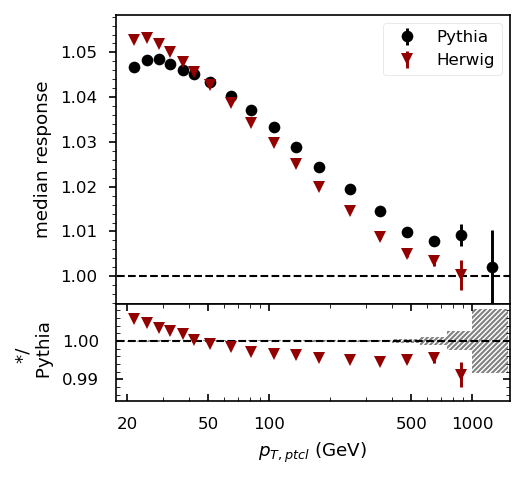

Fitting subsample:  u
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_u_eta25to30_L5_Pythia--median


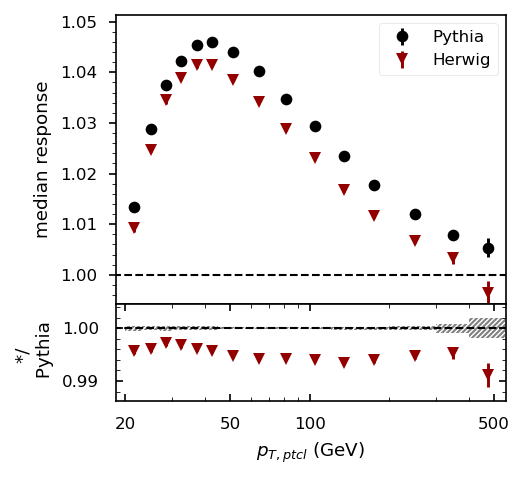

Fitting subsample:  u
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_u_eta30to50_L5_Pythia--median


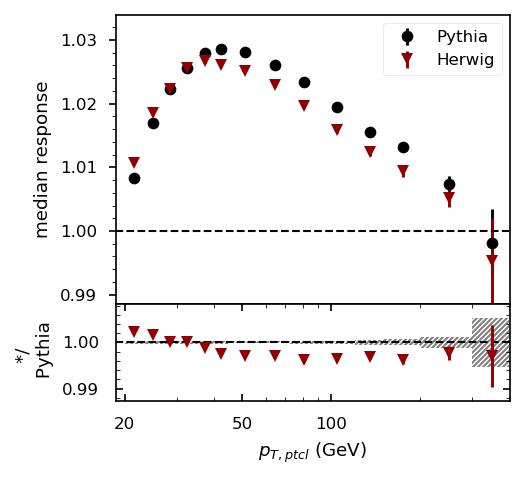

Fitting subsample:  s
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_s_eta00to13_L5_Pythia--median


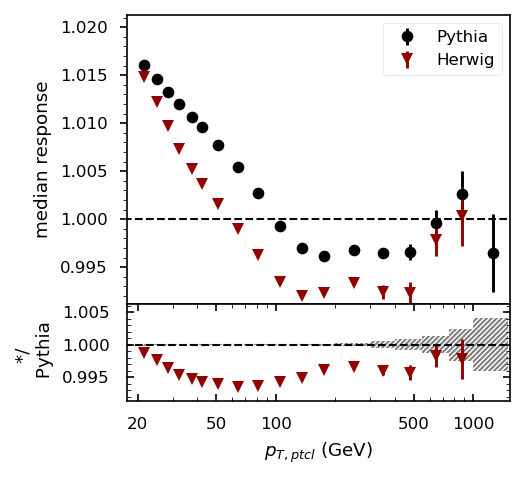

Fitting subsample:  s
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_s_eta13to25_L5_Pythia--median


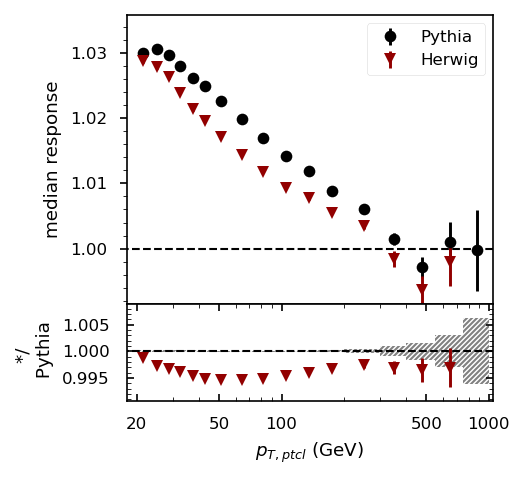

Fitting subsample:  s
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_s_eta25to30_L5_Pythia--median


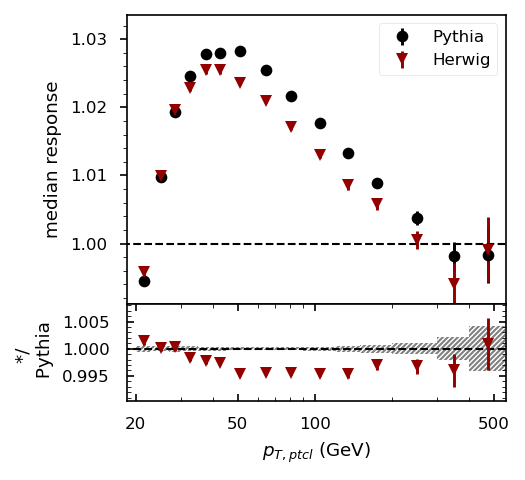

Fitting subsample:  s
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_s_eta30to50_L5_Pythia--median


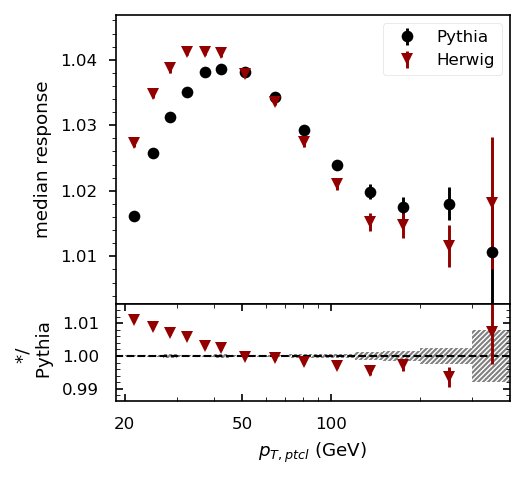

Fitting subsample:  g
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_g_eta00to13_L5_Pythia--median


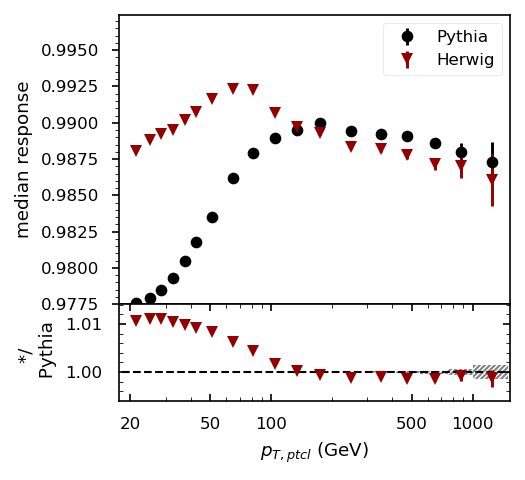

Fitting subsample:  g
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_g_eta13to25_L5_Pythia--median


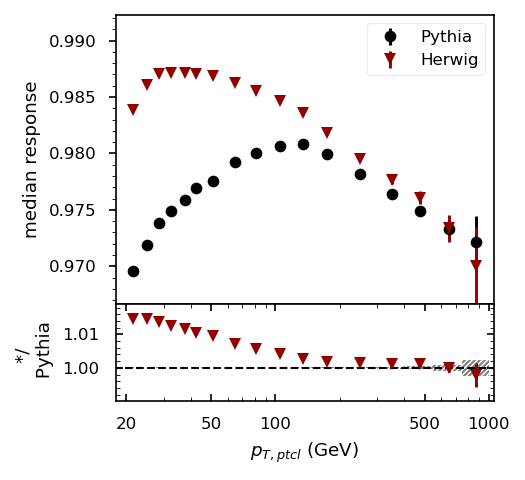

Fitting subsample:  g
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_g_eta25to30_L5_Pythia--median


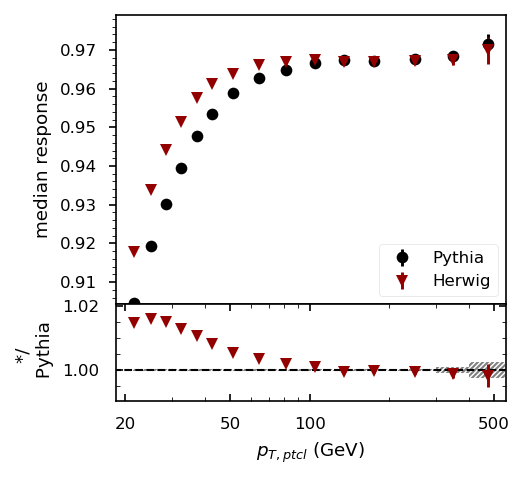

Fitting subsample:  g
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_g_eta30to50_L5_Pythia--median


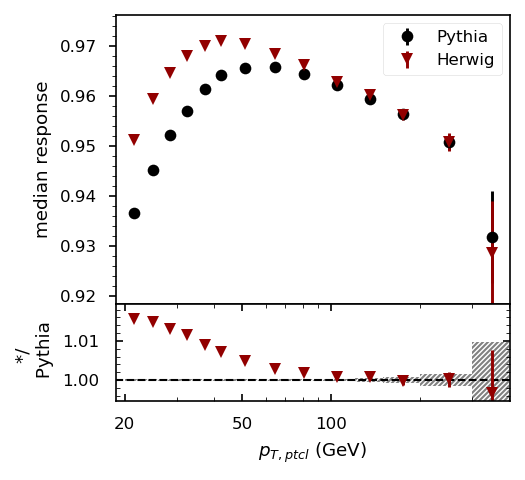

Fitting subsample:  ud
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_ud_eta00to13_L5_Pythia--median


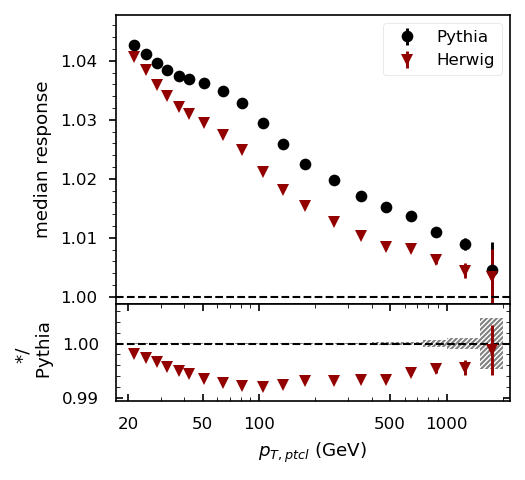

Fitting subsample:  ud
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_ud_eta13to25_L5_Pythia--median


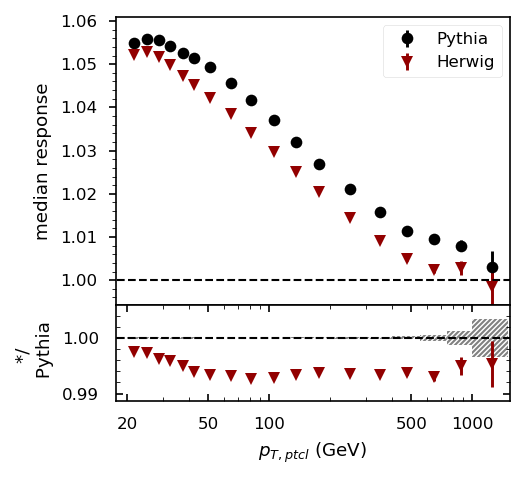

Fitting subsample:  ud
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_ud_eta25to30_L5_Pythia--median


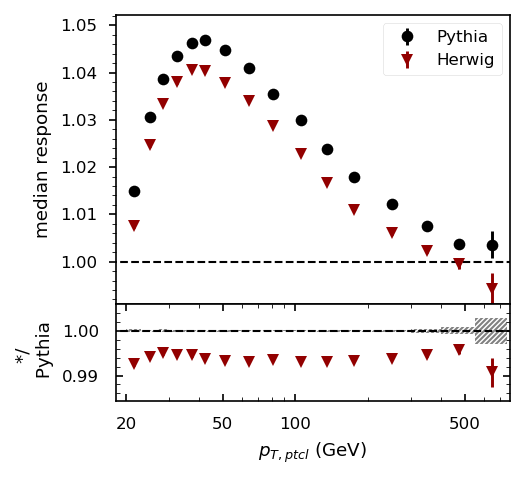

Fitting subsample:  ud
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_ud_eta30to50_L5_Pythia--median


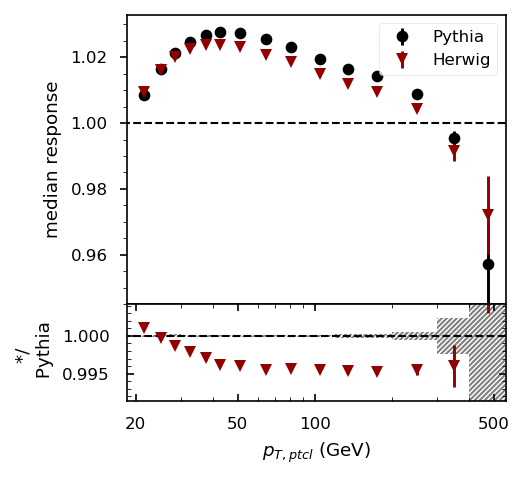

Fitting subsample:  q
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_q_eta00to13_L5_Pythia--median


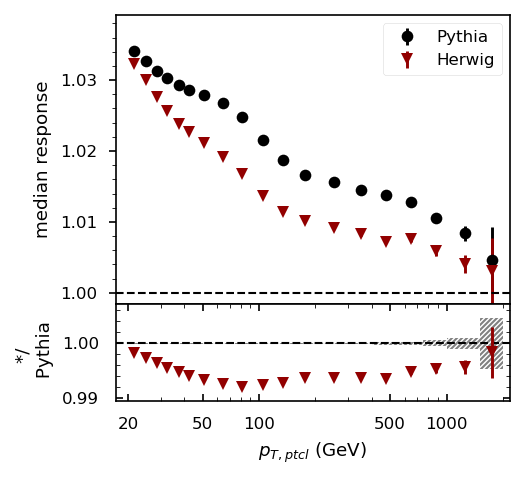

Fitting subsample:  q
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_q_eta13to25_L5_Pythia--median


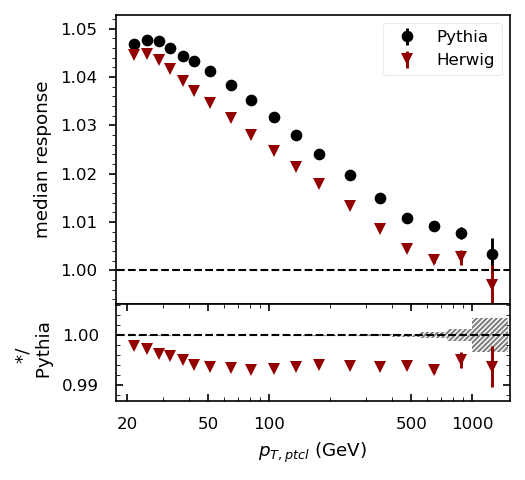

Fitting subsample:  q
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_q_eta25to30_L5_Pythia--median


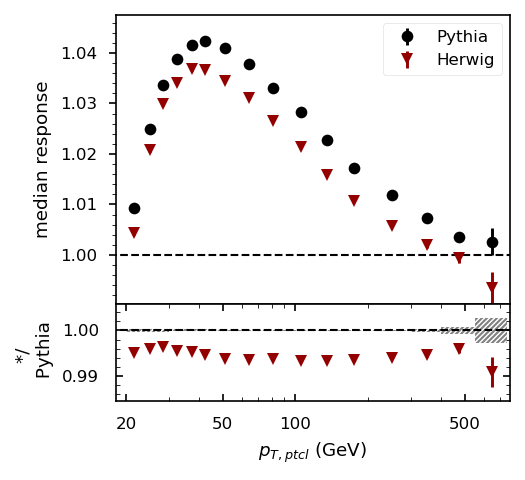

Fitting subsample:  q
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_q_eta30to50_L5_Pythia--median


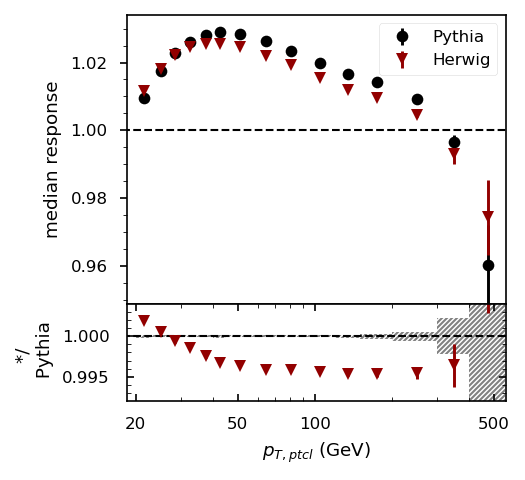

Fitting subsample:  all
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_all_eta00to13_L5_Pythia--median


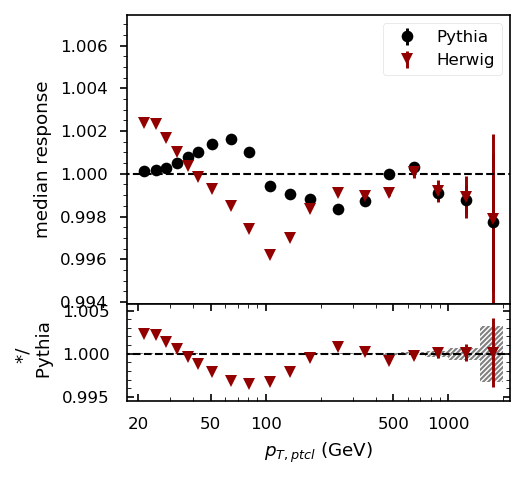

Fitting subsample:  all
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_all_eta13to25_L5_Pythia--median


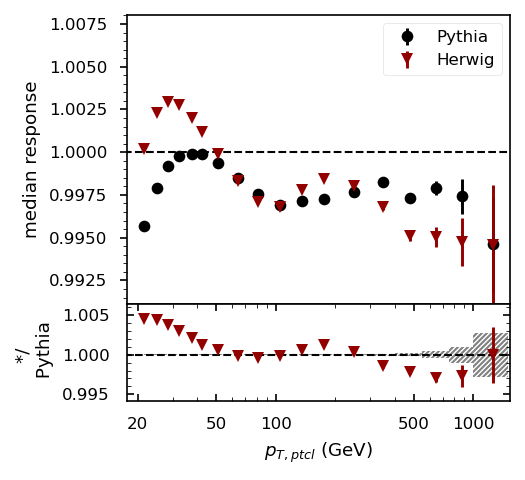

Fitting subsample:  all
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_all_eta25to30_L5_Pythia--median


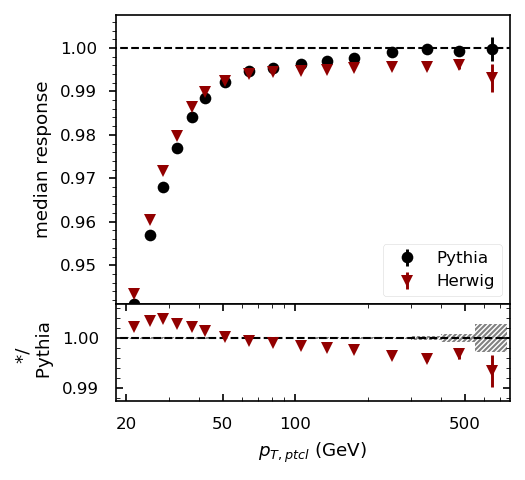

Fitting subsample:  all
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_all_eta30to50_L5_Pythia--median


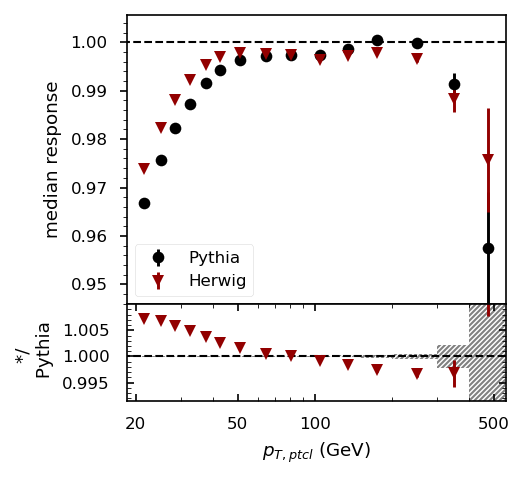

FileNotFoundError: [Errno 2] No such file or directory: 'out_txt/EtaBinsvsPtBinsMedian_untagged_L5_TTBAR-JME.csv'

In [15]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
subsamples = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all', 'untagged']
# subsamples = ['b', 'c']
# subsamples = ['all', 'b']
tag1 = '_L5_TTBAR-JME'
tag2 = '_L5_Herwig-TTBAR'
# tag3 = '_L5_QCD-JME-leading3jets'
# tag4 = '_L5_QCD-JME-weights-leading3jets'
# tag5 = '_L5_Herwig-QCD'
# tag3 = '_L5_QCD-divided'

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_1 = read_data(mean_name, 'all', "_L5_QCD-JME-leading3jets")
# closure_2 = read_data(mean_name, 'all', tag2)
# closure_3 = read_data(mean_name, 'all', tag3)
# closure_4 = read_data(mean_name, 'all', tag4)
# closure_Her = read_data(mean_name, 'all', tag5)

k2 = np.where(etabins_mod<=0)[0][-1]
k4 = np.where(etabins_mod<=1.3)[0][-1]
k6 = np.where(etabins_mod<=2.5)[0][-1]
k8 = np.where(etabins_mod<=3.0)[0][-1]
ks = [k2, k4, k6, k8]

# ks = [k2, k4] #, k6, k8]
for samp in subsamples:
    median_base = read_data(mean_name, samp, tag1) #/closure_1 #[2:]
    medianstd_base = read_data(mean_name_std, samp, tag1) #[2:]
    reco_pt = read_data("MeanRecoPt", samp, tag1)
    median_2 = read_data(mean_name, samp, tag2) #/closure_1
    medianstd_2 = read_data(mean_name_std, samp, tag2)
    reco_pt2 = read_data("MeanRecoPt", samp, tag2)
    median_2[:2,:] = np.nan
#     median_3 = read_data(mean_name, samp, tag3)/closure_3
#     medianstd_3 = read_data(mean_name_std, samp, tag3)
#     reco_pt3 = read_data("MeanRecoPt", samp, tag3)
#     median_4 = read_data(mean_name, samp, tag4)/closure_4
#     medianstd_4 = read_data(mean_name_std, samp, tag4)
#     reco_pt4 = read_data("MeanRecoPt", samp, tag4)
#     median_5 = read_data(mean_name, samp, tag5)/closure_Her
#     medianstd_5 = read_data(mean_name_std, samp, tag5)
#     reco_pt5 = read_data("MeanRecoPt", samp, tag5)
    data = {
        "Pythia": [median_base, medianstd_base, reco_pt],
#         "weights-on": [median_2, medianstd_2, reco_pt2],
#         "3 leading jets, weights-off": [median_3, medianstd_3, reco_pt3],
#         "3 leading jets,weights-on": [median_4, medianstd_4, reco_pt4],
        "Herwig": [median_2, medianstd_2, reco_pt2]
#         "divided": [median_3, medianstd_3, ptbins_c],
       }

    for k in ks:
        print('Fitting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median_base[:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etaidx=k, samp=samp, ratio_name='*/ \n Pythia')
        
3;

### Comparison with old corrections

In [15]:
Aut18_samples = ['all', 'b', 'c', 's', 'ud', 'g' ]
Sum16_samples = ['b', 'c', 's', 'ud', 'g' ]

In [40]:
list_corr_Sum16 = ["Summer16_07Aug2017_V15_Flavor_Pythia8_MC_"+samp+"_L5Flavor_AK4PFchs.txt" for samp in Sum16_samples]
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs.txt")
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L3Absolute_AK4PFchs.txt")
corr_loc_Sum16 = ["* * Summer16_07Aug2017_V15_Flavor_Pythia8_MC/"+corr for corr in list_corr_Sum16]
list_corr_Aut18 = ["Autumn18_V3_MC_Pythia8_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18 = ["* * Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
corr_loc_Winter14 = ["* * Winter14_V8_MC_L5Flavor_AK5PFchs.txt"]
corr_loc_Sum20 = ["* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs.txt"]

list_corr_Aut18 = ["Autumn18_V3_MC_Herwig7_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18_Her = ["* * Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
corr_loc_Sum20_Her = ["* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her.txt"]

In [43]:
# corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Aut18_Her+corr_loc_Sum20_Her

In [44]:
from coffea.lookup_tools import extractor
ext = extractor()
ext.add_weight_sets(corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Aut18_Her+corr_loc_Sum20_Her)
# ext.add_weight_sets(corr_loc_Winter14)
ext.finalize()

# ext._names
evaluator = ext.make_evaluator()
# evo = evaluator['Autumn18_V3_MC_Pythia8_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']

In [45]:
# dir(evaluator)
# evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
# evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L3Absolute_AK4PFchs']

In [46]:
# lambda a, b : 1/evo2(a, b) 

In [47]:
# median2.shape
# medianstd2.shape
# reco_pt.shape

# closure_corr.shape

In [48]:
# import matplotlib.pyplot as plt
# # from cycler import cycler
# import cycler
# plt.rcParams['axes.prop_cycle'] = cycler.concat(cycler.cycler(color=['k']),plt.rcParams['axes.prop_cycle'])

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  b
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_b_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


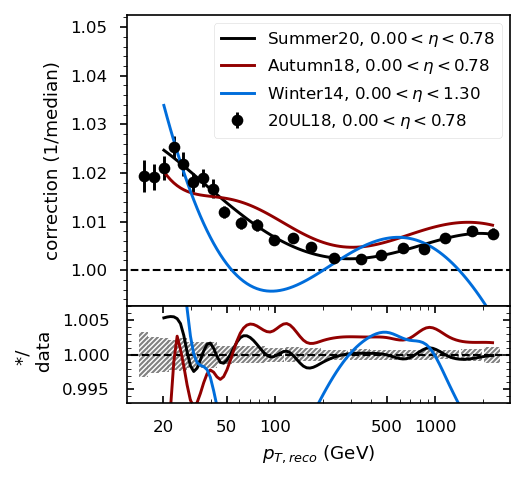

Plotting subsample:  b
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_b_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


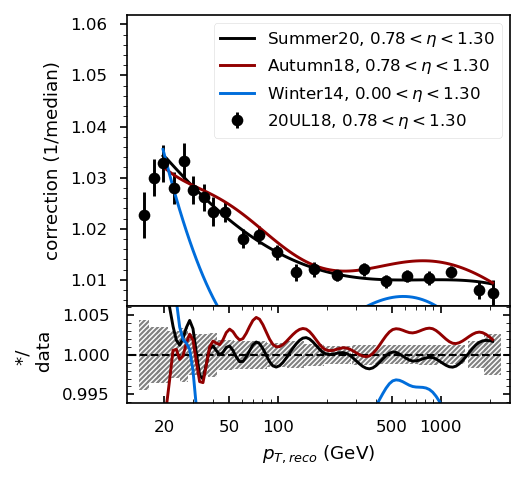

Plotting subsample:  b
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_b_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


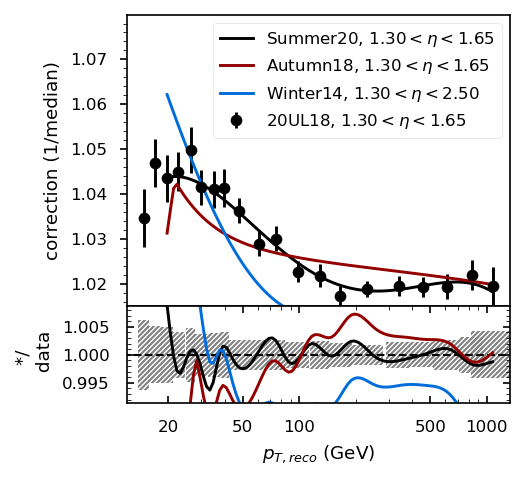

Plotting subsample:  b
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_b_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


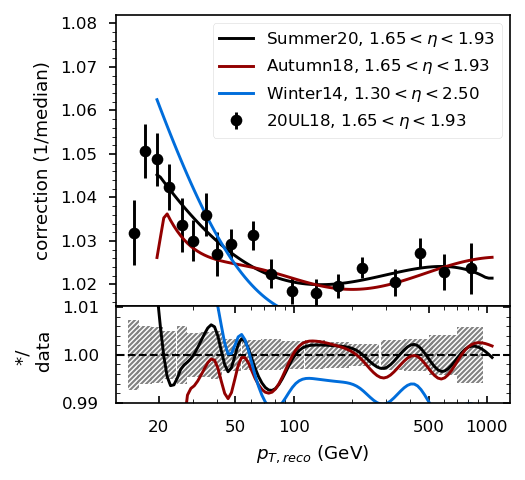

Plotting subsample:  b
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_b_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


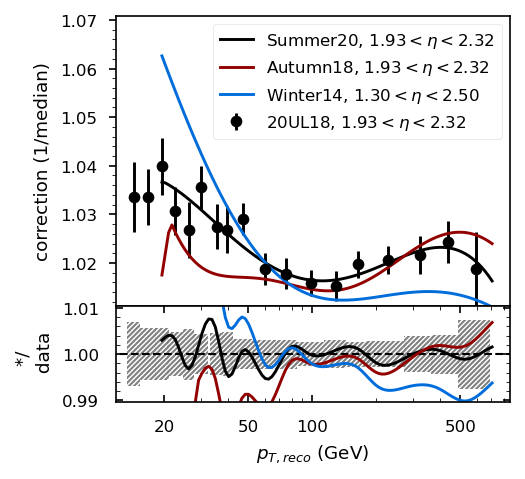

Plotting subsample:  b
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_b_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


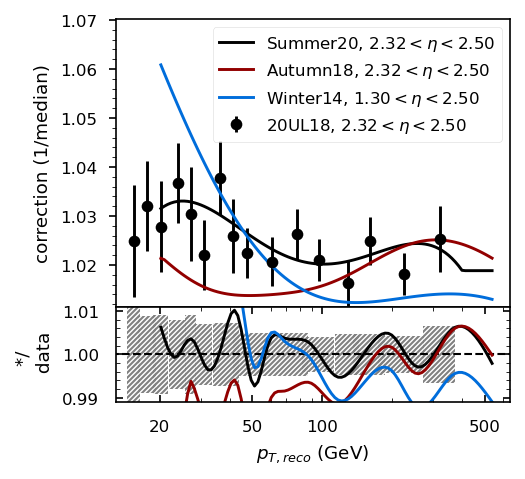

Plotting subsample:  b
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_b_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


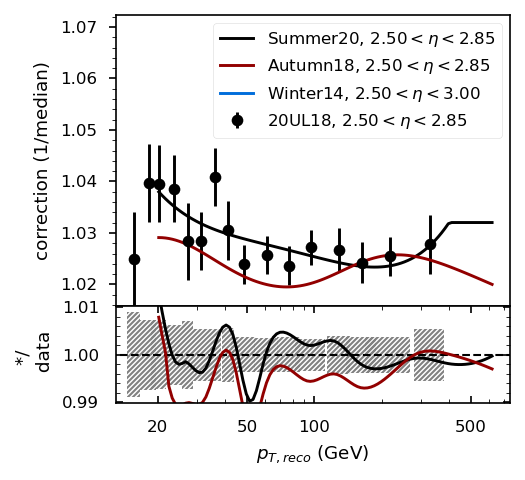

Plotting subsample:  b
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_b_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


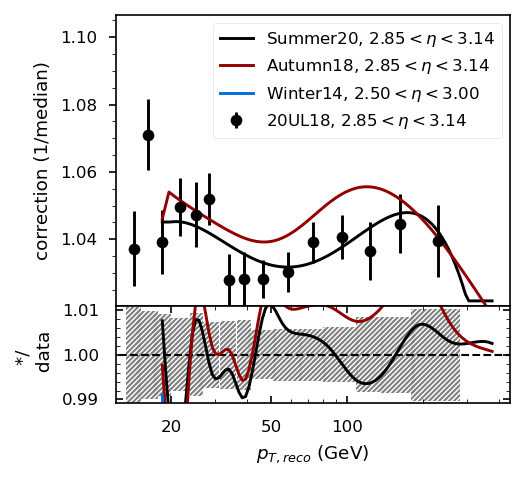

Plotting subsample:  b
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_b_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


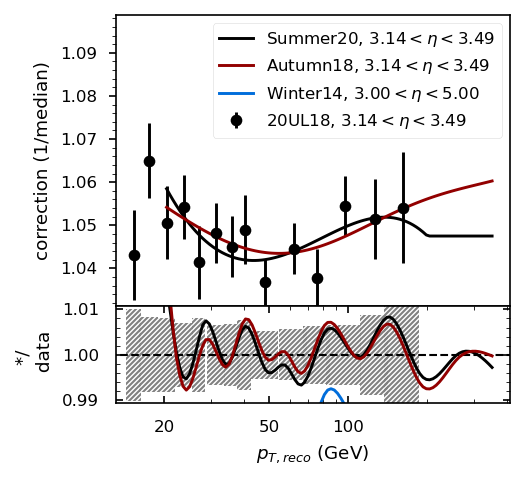

Plotting subsample:  b
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_b_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


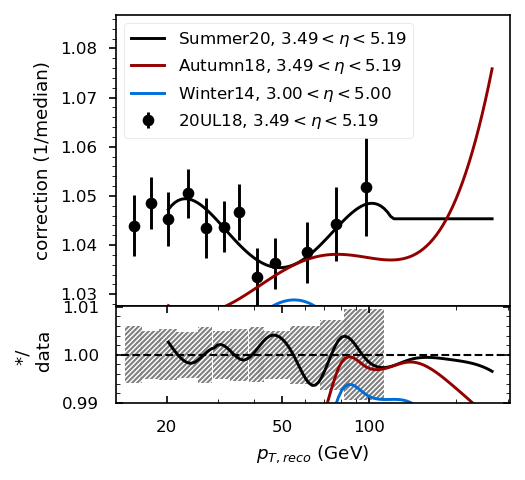

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  c
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_c_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


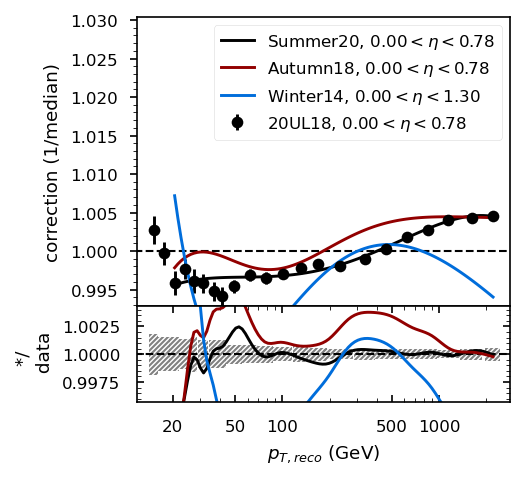

Plotting subsample:  c
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_c_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


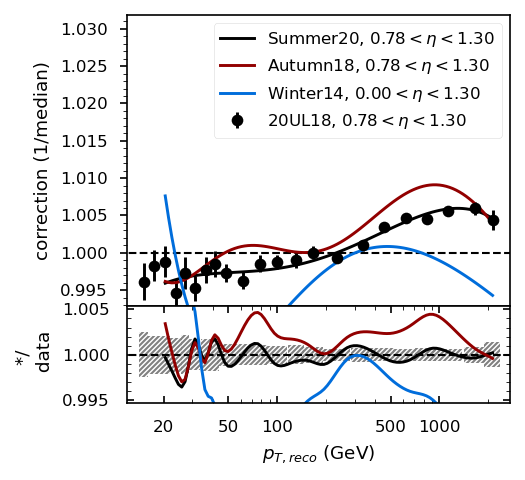

Plotting subsample:  c
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_c_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


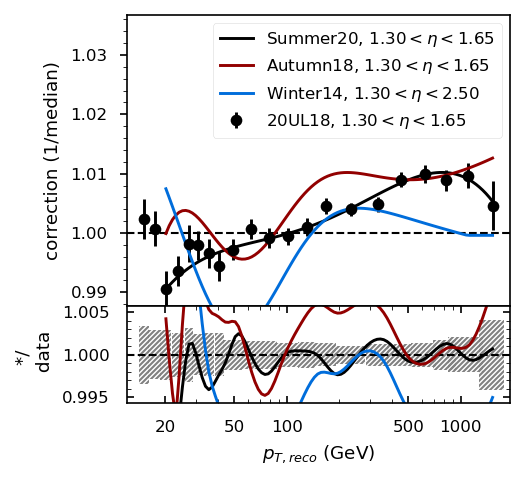

Plotting subsample:  c
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_c_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


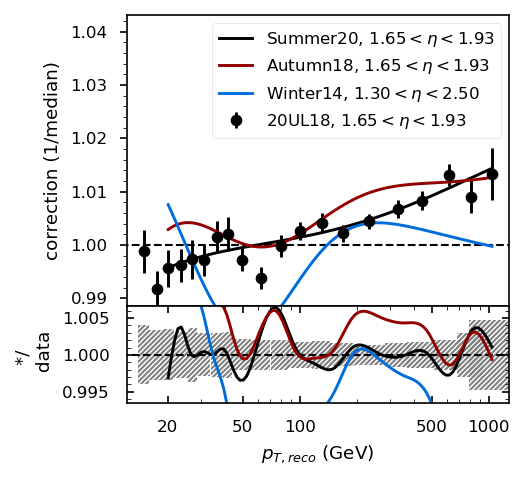

Plotting subsample:  c
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_c_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


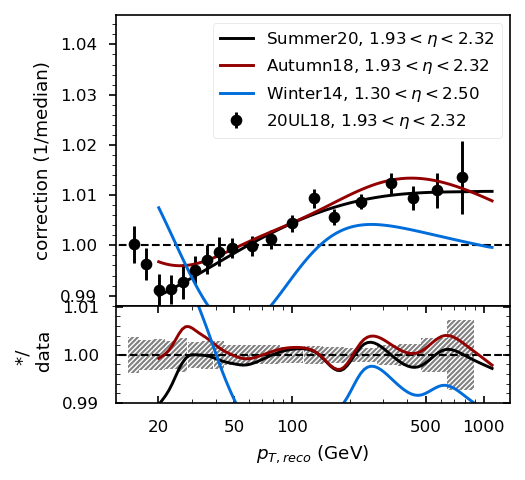

Plotting subsample:  c
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_c_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


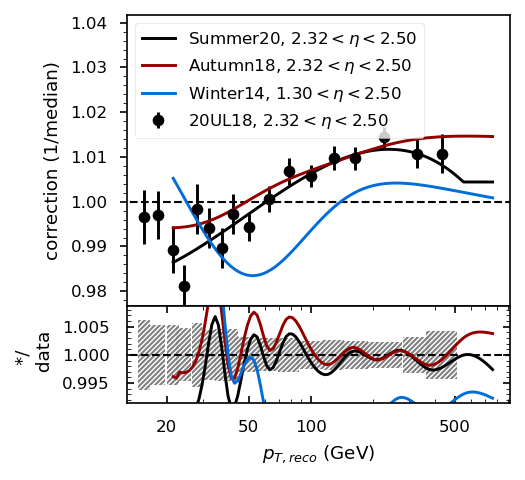

Plotting subsample:  c
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_c_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


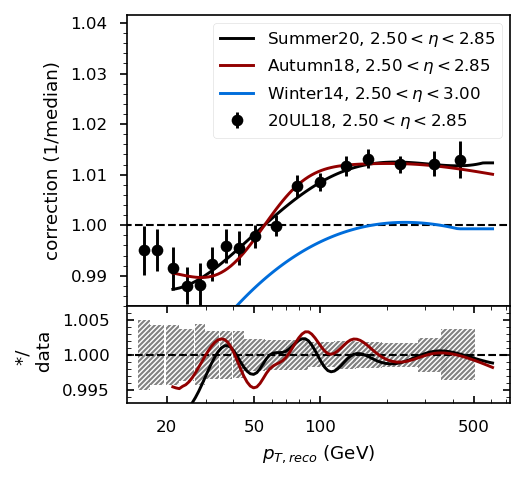

Plotting subsample:  c
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_c_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


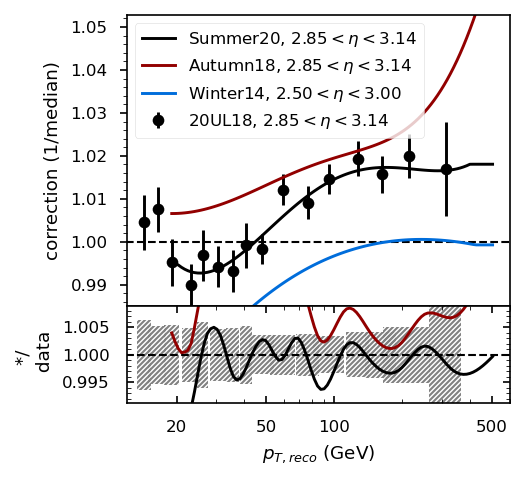

Plotting subsample:  c
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_c_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


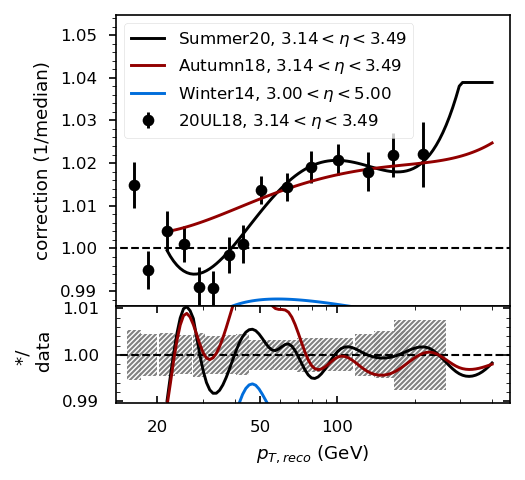

Plotting subsample:  c
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_c_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


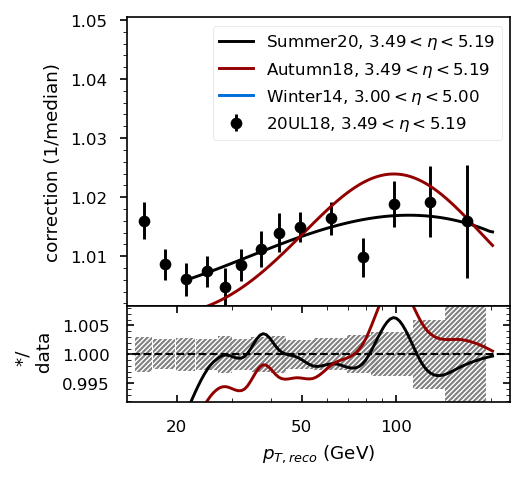

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  ud
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_ud_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


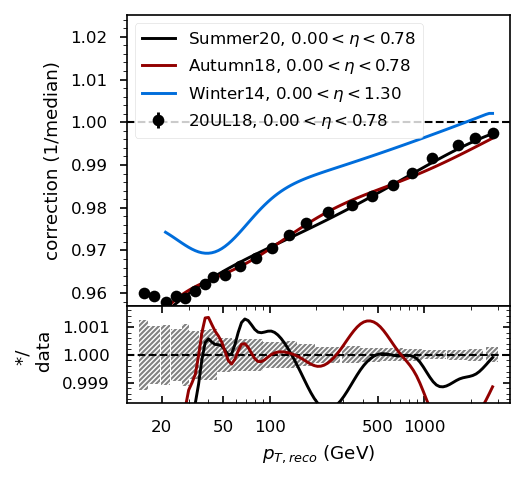

Plotting subsample:  ud
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_ud_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


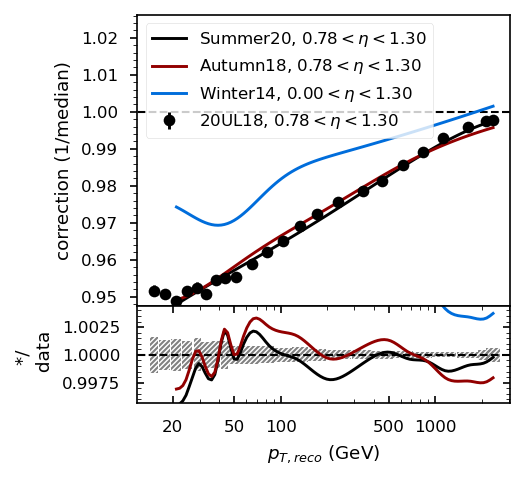

Plotting subsample:  ud
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_ud_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


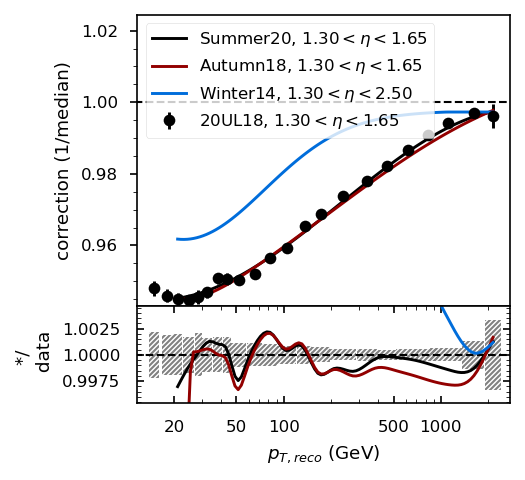

Plotting subsample:  ud
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_ud_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


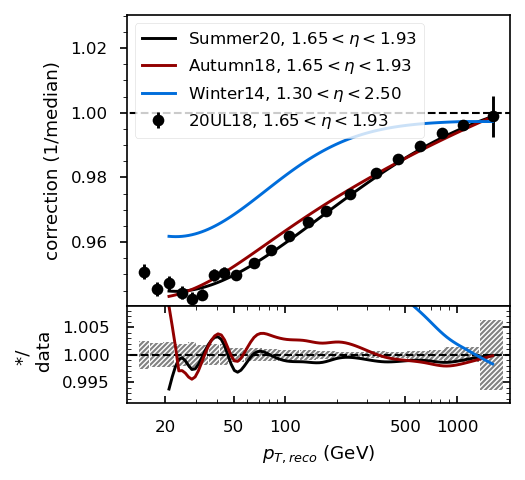

Plotting subsample:  ud
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_ud_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


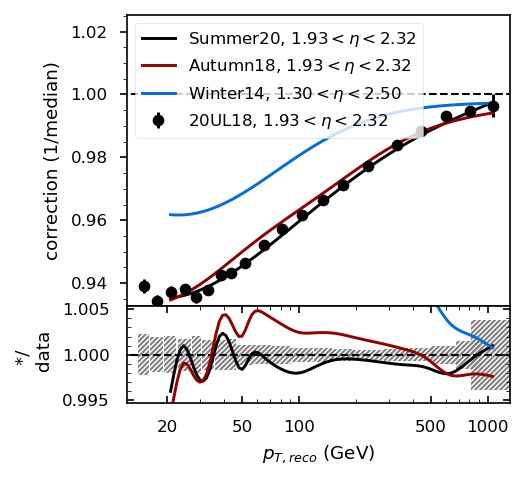

Plotting subsample:  ud
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_ud_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


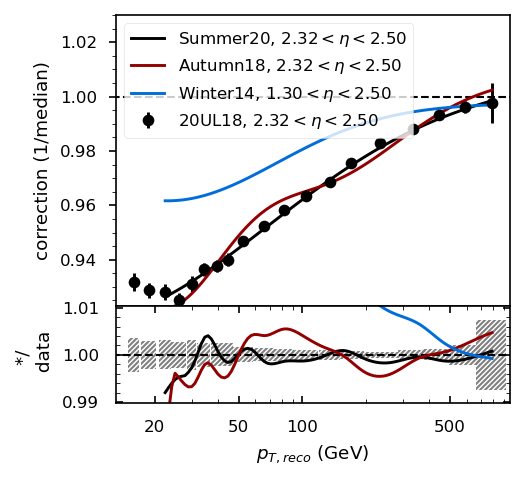

Plotting subsample:  ud
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_ud_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


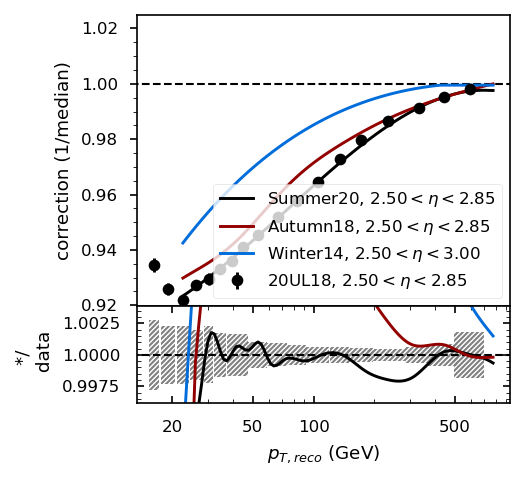

Plotting subsample:  ud
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_ud_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


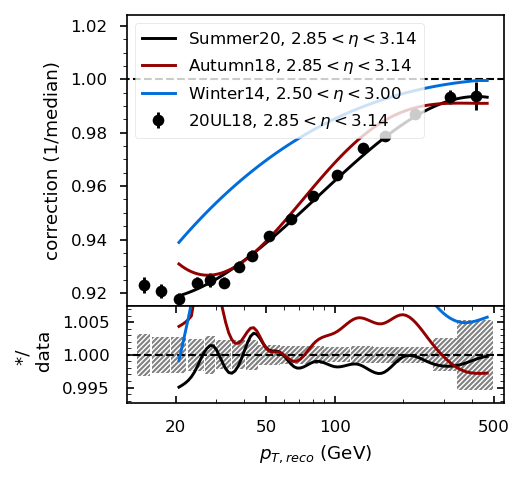

Plotting subsample:  ud
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_ud_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


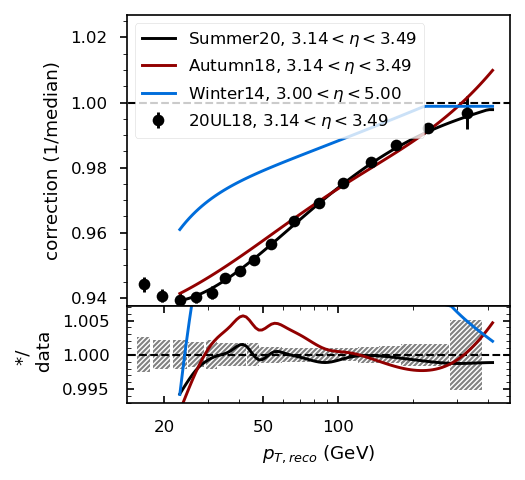

Plotting subsample:  ud
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_ud_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


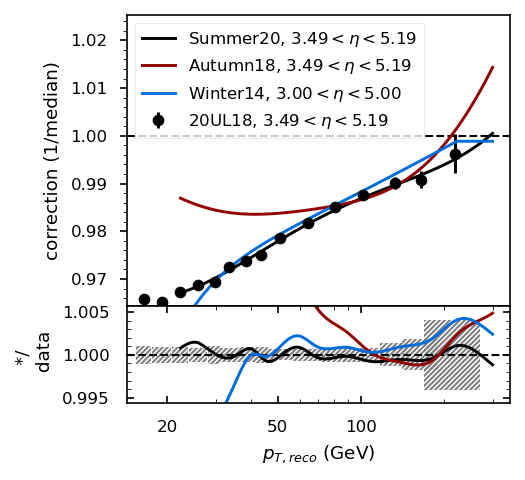

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  s
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_s_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


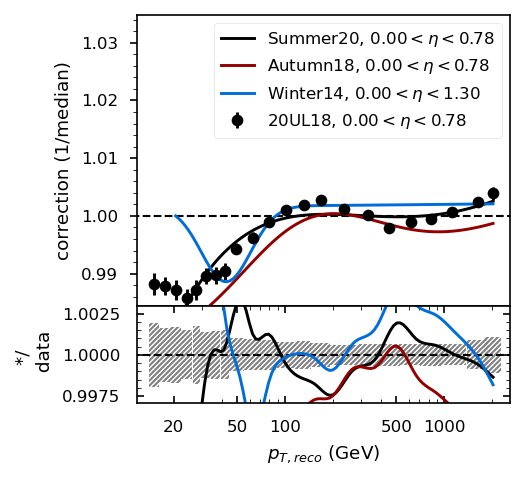

Plotting subsample:  s
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_s_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


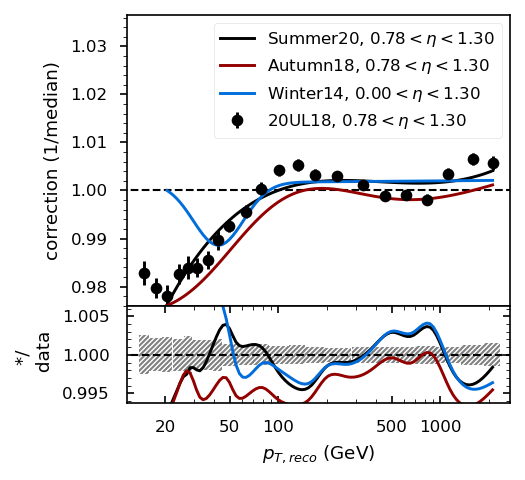

Plotting subsample:  s
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_s_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


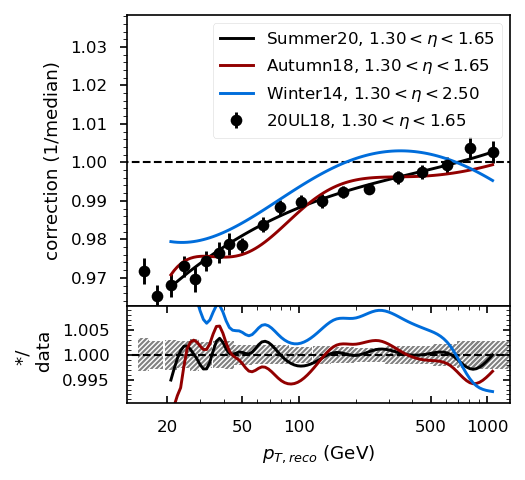

Plotting subsample:  s
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_s_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


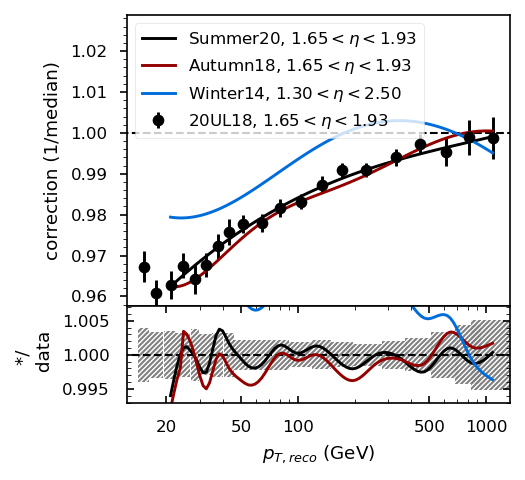

Plotting subsample:  s
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_s_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


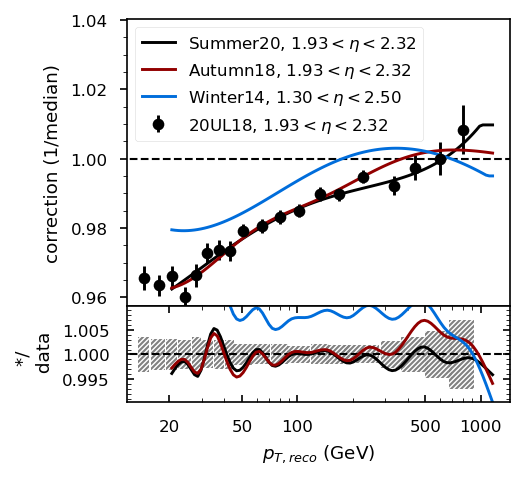

Plotting subsample:  s
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_s_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


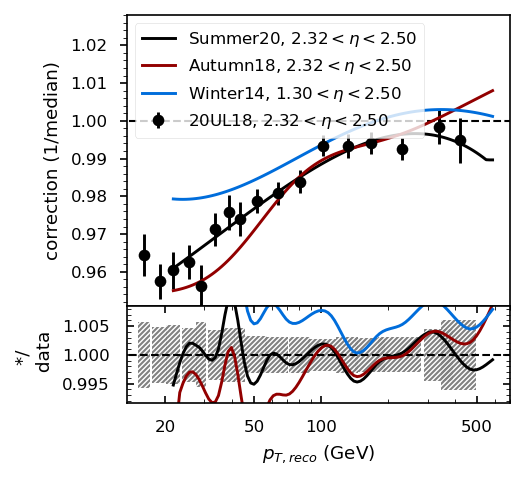

Plotting subsample:  s
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_s_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


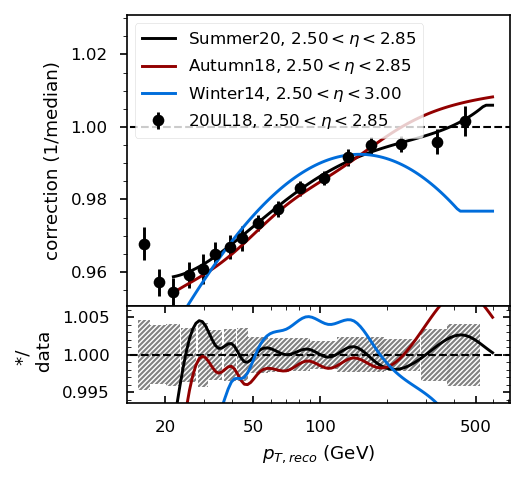

Plotting subsample:  s
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_s_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


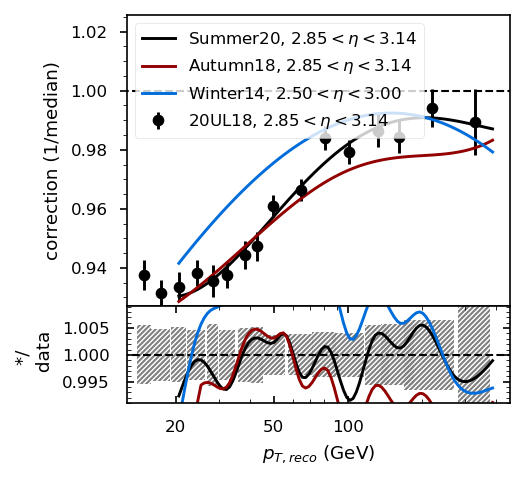

Plotting subsample:  s
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_s_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


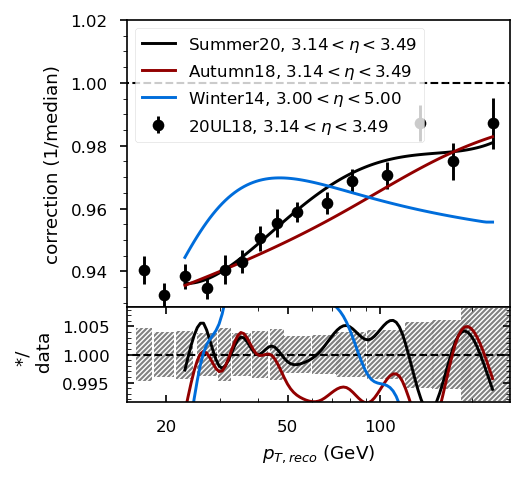

Plotting subsample:  s
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_s_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


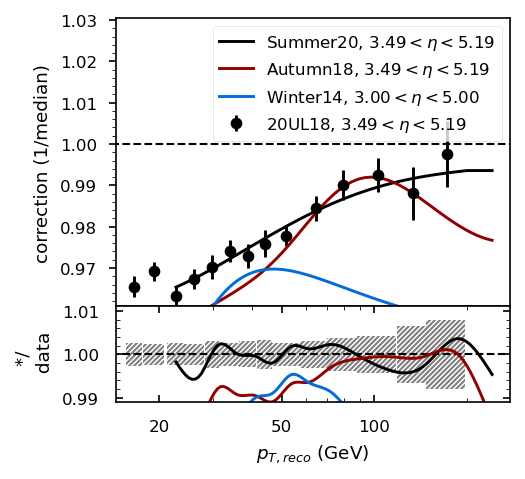

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  g
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_g_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


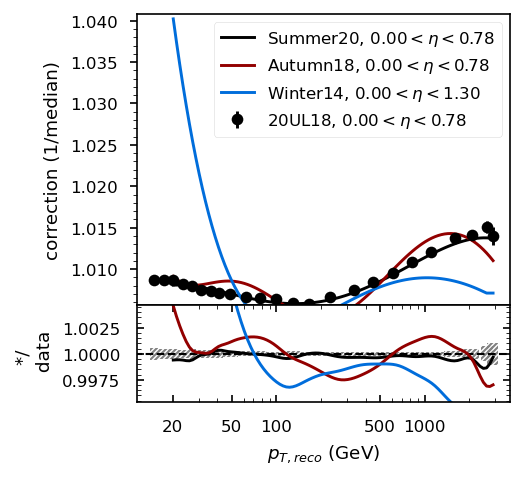

Plotting subsample:  g
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_g_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


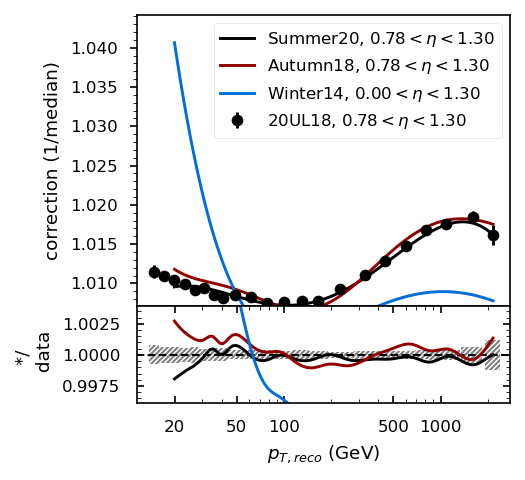

Plotting subsample:  g
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_g_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


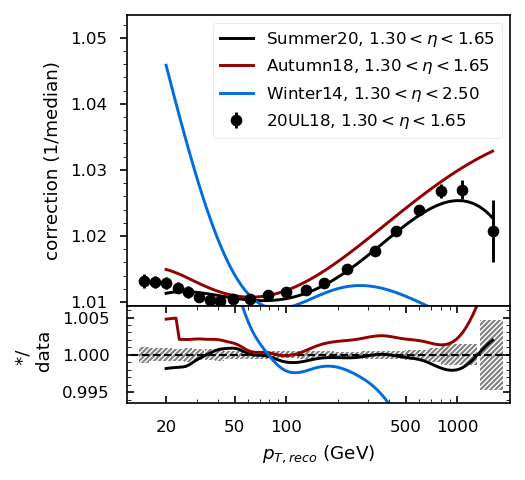

Plotting subsample:  g
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_g_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


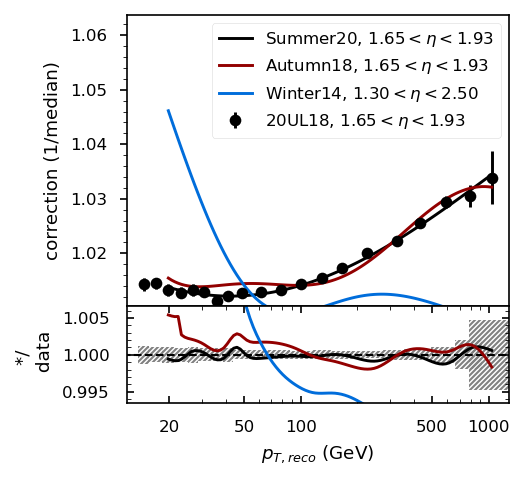

Plotting subsample:  g
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_g_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


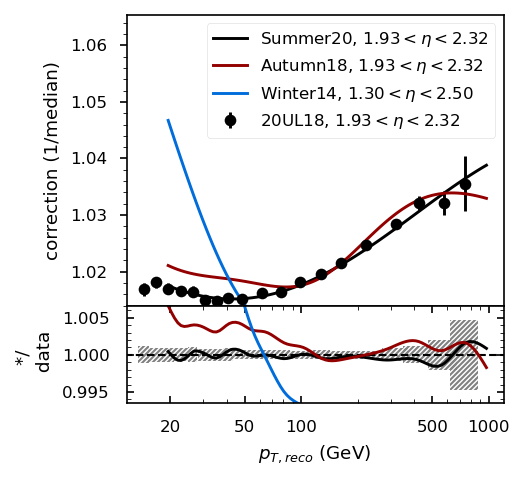

Plotting subsample:  g
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_g_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


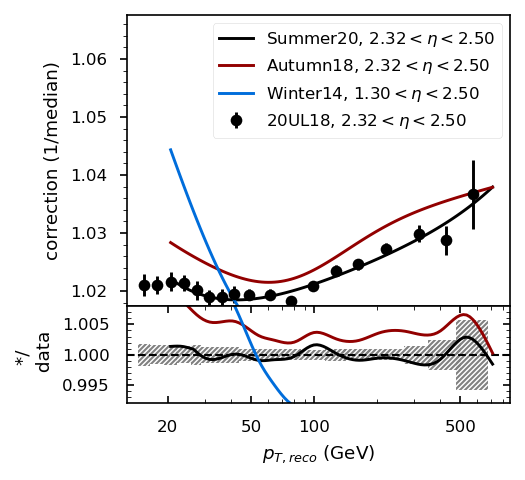

Plotting subsample:  g
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_g_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


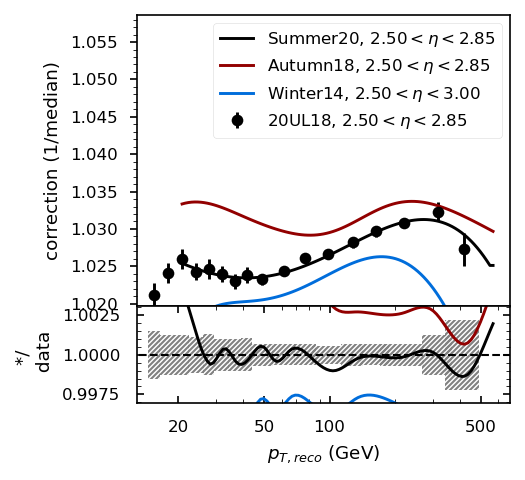

Plotting subsample:  g
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_g_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


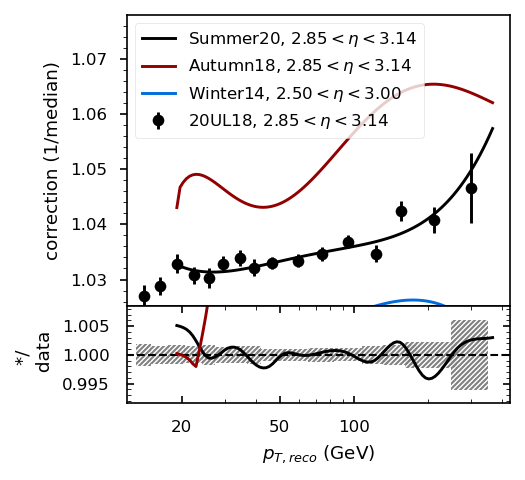

Plotting subsample:  g
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_g_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


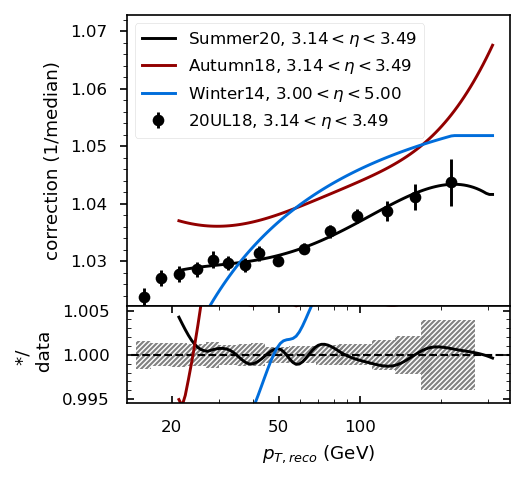

Plotting subsample:  g
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_g_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


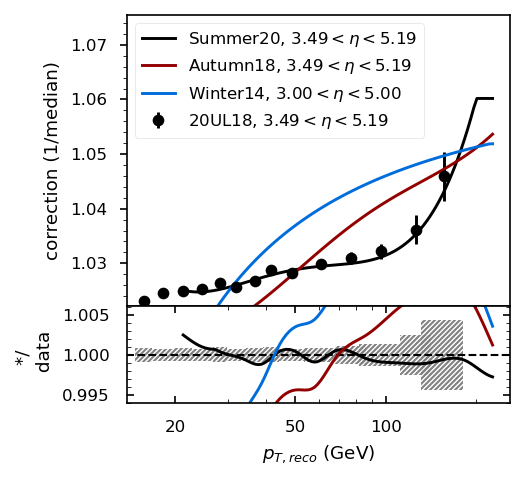

/tmp/anpotreb/ipykernel_6430/1535476592.py:55: RuntimeWarning: invalid value encountered in true_divide
  "20UL18": [median2/closure_corr, medianstd2, reco_pt],


Plotting subsample:  all
Eta:  0
Saving plot for eta =  _eta00to0783
Saving plot with the name =  fig/corr_vs_pt_all_eta00to0783_L5_20UL18-Summer20-Autumn18-Winter14-median


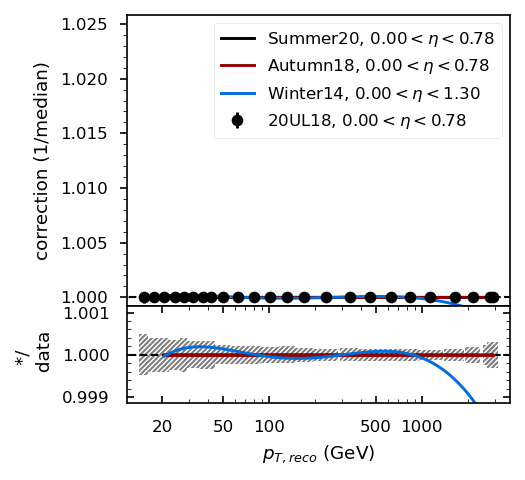

Plotting subsample:  all
Eta:  1
Saving plot for eta =  _eta0783to1305
Saving plot with the name =  fig/corr_vs_pt_all_eta0783to1305_L5_20UL18-Summer20-Autumn18-Winter14-median


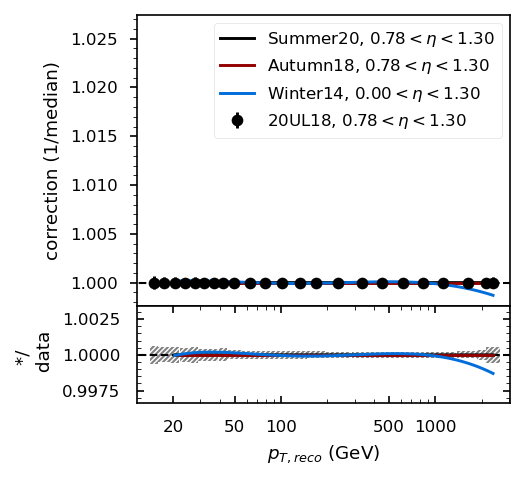

Plotting subsample:  all
Eta:  2
Saving plot for eta =  _eta1305to1653
Saving plot with the name =  fig/corr_vs_pt_all_eta1305to1653_L5_20UL18-Summer20-Autumn18-Winter14-median


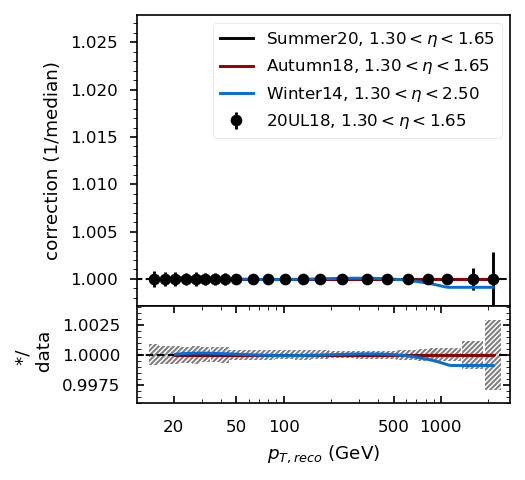

Plotting subsample:  all
Eta:  3
Saving plot for eta =  _eta1653to193
Saving plot with the name =  fig/corr_vs_pt_all_eta1653to193_L5_20UL18-Summer20-Autumn18-Winter14-median


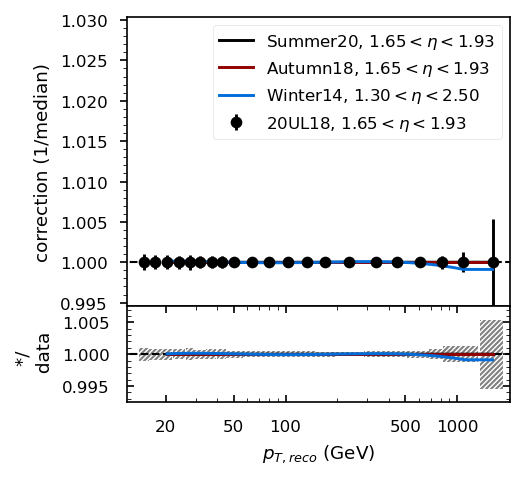

Plotting subsample:  all
Eta:  4
Saving plot for eta =  _eta193to2322
Saving plot with the name =  fig/corr_vs_pt_all_eta193to2322_L5_20UL18-Summer20-Autumn18-Winter14-median


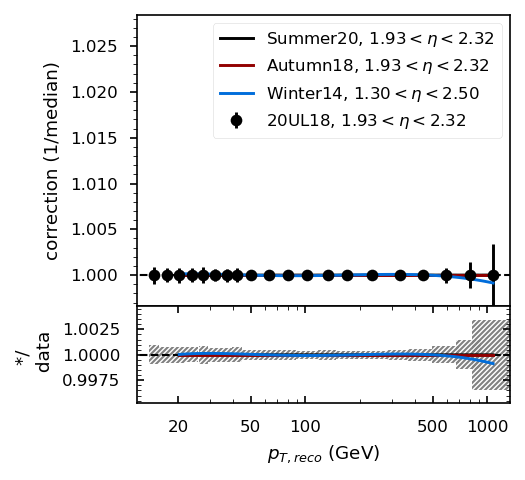

Plotting subsample:  all
Eta:  5
Saving plot for eta =  _eta2322to25
Saving plot with the name =  fig/corr_vs_pt_all_eta2322to25_L5_20UL18-Summer20-Autumn18-Winter14-median


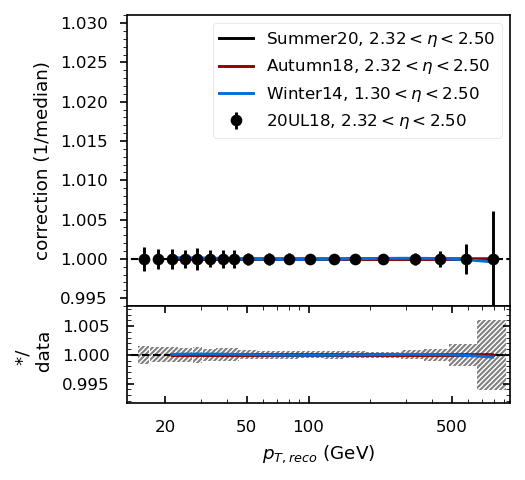

Plotting subsample:  all
Eta:  6
Saving plot for eta =  _eta25to2853
Saving plot with the name =  fig/corr_vs_pt_all_eta25to2853_L5_20UL18-Summer20-Autumn18-Winter14-median


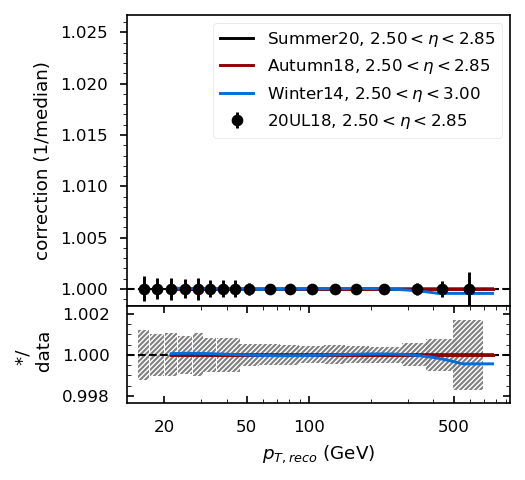

Plotting subsample:  all
Eta:  7
Saving plot for eta =  _eta2853to3139
Saving plot with the name =  fig/corr_vs_pt_all_eta2853to3139_L5_20UL18-Summer20-Autumn18-Winter14-median


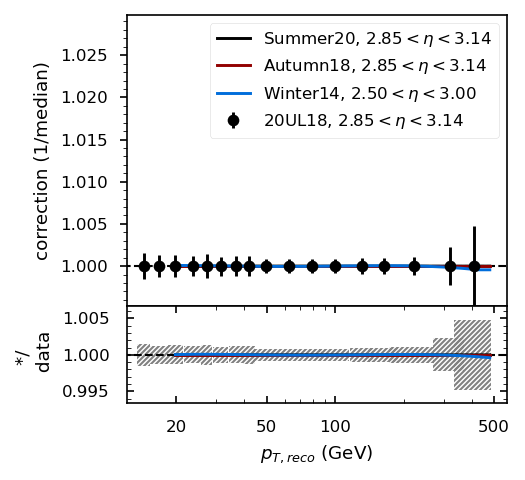

Plotting subsample:  all
Eta:  8
Saving plot for eta =  _eta3139to3489
Saving plot with the name =  fig/corr_vs_pt_all_eta3139to3489_L5_20UL18-Summer20-Autumn18-Winter14-median


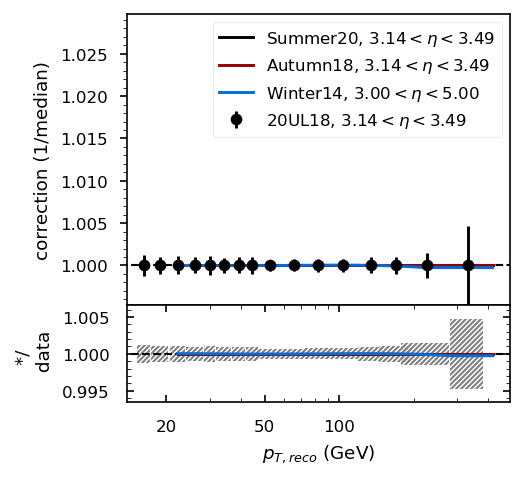

Plotting subsample:  all
Eta:  9
Saving plot for eta =  _eta3489to5191
Saving plot with the name =  fig/corr_vs_pt_all_eta3489to5191_L5_20UL18-Summer20-Autumn18-Winter14-median


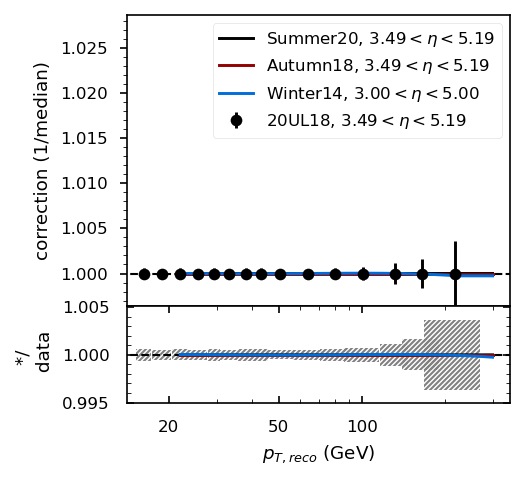

In [50]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
subsamples = ['b', 'c', 'ud', 's', 'g', 'all']

# subsamples = ['ud', 'b']
# subsamples = ['all']

tag1 = '_L5_Herwig-QCD-etaAut18'
tag2 = '_L5_QCD-JME-etaAut18'
# tag3 = '_L5_QCD-divided'

# closure_corr = read_data("Median", "all", tag2)
closure_corr = read_data("Median", "all", tag2) #divide by Pythia

# df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
# closure_corr = df_csv.to_numpy().transpose()

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']


for samp in subsamples:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' else '_'+samp_Aut18

    median1 = read_data(mean_name, samp, tag1) #[2:]
    medianstd1 = read_data(mean_name_std, samp, tag1)
    reco_pt = read_data("MeanRecoPt", samp, tag1)
    median2 = read_data(mean_name, samp, tag2) #[2:]
    medianstd2 = read_data(mean_name_std, samp, tag2)
    
    evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
    evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
    if samp_Aut18=='_all':
        evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
    else:
        evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    if samp_Aut18!='_all':
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs{samp_Aut18}J']
        evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs{samp_Aut18}J']
    else:
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs_aJ']
        evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_aJ']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
#             "No_closure": [median2, medianstd2, reco_pt],
#             "Her7": [median1/closure_corr, medianstd1, reco_pt],
            "20UL18": [median2/closure_corr, medianstd2, reco_pt],
           }
    
    functions = {
#             "Summer20_Her":   [evo4_Her, None],
            "Summer20":    [evo4, None],    
            "Autumn18":    [evo, closure_Aut18],
            "Winter14":       [evo3, None],
#             "Autumn18_Her":   [evo_Her, closure_Aut18],
            
           }
    
    for k in range(len(etabins_mod)-1):
#     for k in [9]:
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
#         median_4 = read_data("Median", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
#         medianstd_4 = read_data("MedianStd", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
        
#         make_comparison_plot_many(data,
#                               correction_fncs = np.array([None]), closures=[], k=0, samp='',
#                                name_base='', names=[], ratio_name='ratio'):
        
        make_comparison_plot(data, 
                                  functions,
                                  etaidx=k, samp=samp, ratio_name='*/ \n data')
        
3;


In [32]:
evo3 = lambda a, b : np.ones_like(a*b)
evo3(1,2)

array(1)

In [27]:
samp_Aut18!='_all'

False

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
# subsamples = ['b', 'c', 'd', 'u', 's', 'g']

subsamples = ['ud', 'b']
# subsamples = ['all']


tag1 = '_L5_Herwig-QCD-etaAut18'
tag2 = '_L5_QCD-JME-etaAut18'
# tag3 = '_L5_QCD-divided'

closure_corr = read_data("Median", "all", tag2)
# closure_corr = read_data("Median", "all", tag2)

# df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
# closure_corr = df_csv.to_numpy().transpose()

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Herwig7_all_L2Relative_AK4PFchs']


# closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Herwig7_MC_L2Relative_AK4PFchs']


for samp in subsamples:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' else '_'+samp_Aut18
#     samp_Sum20 = '_q' if samp_Aut18=='_ud' else '_'+samp
#     samp_Sum16 = '' if samp_Aut18=='_all' else samp_Aut18

    median1 = read_data(mean_name, samp, tag1) #[2:]
    medianstd1 = read_data(mean_name_std, samp, tag1)
    reco_pt = read_data("MeanRecoPt", samp, tag1)

    median2 = read_data(mean_name, samp, tag2) #[2:]
    medianstd2 = read_data(mean_name_std, samp, tag2)
    evo = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     if samp_Aut18=='_all':
#         evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
#     else:
#         evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
    evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
#             "No_closure": [median2, medianstd2, reco_pt],
            "Her7": [median1/closure_corr, medianstd1, reco_pt],
            "Py8": [median2/closure_corr, medianstd2, reco_pt],
           }
    
    functions = {
            "Autumn18_He": [evo, closure_Aut18],
            "Winter14":       [evo3, None],
            "Summer20_He":       [evo4, None],
           }
    
    for k in range(len(etabins_mod)-1):
#     for k in [9]:
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
#         median_4 = read_data("Median", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
#         medianstd_4 = read_data("MedianStd", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
        
#         make_comparison_plot_many(data,
#                               correction_fncs = np.array([None]), closures=[], k=0, samp='',
#                                name_base='', names=[], ratio_name='ratio'):
        
        make_comparison_plot(data, 
                                  functions,
                                  etaidx=k, samp=samp, ratio_name='*/ \n Herwig')
        
3;


In [14]:
etabins_mod

array([0.   , 0.783, 1.305, 1.653, 1.93 , 2.322, 2.5  , 2.853, 3.139,
       3.489, 5.191])

In [160]:
evaluator._functions['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_b_L5Flavor_AK4PFchs']

binned dims: ['JetEta']
eval vars  : ['JetPt']
parameters : ['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']
formula    : max(0.0001,((JetPt<p6)*(p7))+((JetPt>=p6)*(p0+(p1/(pow(log10(JetPt),2)+p2))+(p3*exp(-p4*(log10(JetPt)-p5)*(log10(JetPt)-p5))))))
signature  : (JetEta,JetPt)

### Double ration plots (for flavour vs antiflavour) responses

In [9]:
def make_double_ratio_plot(outputname1, outputname2, k=0, samp='',
                            ratio_name='ratio'):
#     outputname1 = '_L5_LHEflav1_TTBAR-JME'
#     outputname2 = '_L5_LHEflav1_Herwig-TTBAR-JME'
        
    median_1 = read_data("Median", samp, outputname1)
    medianstd_1 = read_data("MedianStd", samp, outputname1)
    median_2 = read_data("Median", samp+'bar', outputname1)
    medianstd_2 = read_data("MedianStd", samp+'bar', outputname1)
    median_3 = read_data("Median", samp, outputname2)
    medianstd_3 = read_data("MedianStd", samp, outputname2)
    median_4 = read_data("Median", samp+'bar', outputname2)
    medianstd_4 = read_data("MedianStd", samp+'bar', outputname2)

        
    yvals_base = median_1
    std_base = medianstd_1

    yvals_ref = median_2
    std_ref = medianstd_2

    yvals_base2 = median_3
    std_base2 = medianstd_3

    yvals_ref2 = median_4
    std_ref2 = medianstd_4


    mean_p_base = yvals_base.copy()
    mean_p_base[(mean_p_base==0) | (np.abs(mean_p_base)==np.inf)] = np.nan

    # mean_ps = []
    # for yvar in yvars:
    #     mean_ps = yvar.copy()

    # yvars[(yvars==0) | (np.abs(yvars)==np.inf)] = np.nan


    # fig = plt.figure()
    # gs = fig.add_gridspec(nrows=1, ncols=1)
    fig, ax2 = plt.subplots();
    # ax2 = fig.add_subplot(gs[1])
    start = np.where(ptbins<=20)[0][-1]

    for axis in [ax2.xaxis, ax2.yaxis]:
        axis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    xvals = (ptbins[start:-1] + ptbins[start+1:])/2
    wd = np.abs(ptbins[start:-1] - ptbins[start+1:])

    yvals_base = mean_p_base[start:,k]
    yvals_base[(yvals_base==0) | (np.abs(yvals_base)==np.inf)] = np.nan
    std_base = std_base[start:,k]

    yvals_ref = yvals_ref[start:,k]
    yvals_ref[(yvals_ref==0) | (np.abs(yvals_ref)==np.inf)] = np.nan
    std_ref = std_ref[start:,k]

    yvals_base2 = yvals_base2[start:,k]
    yvals_base2[(yvals_base2==0) | (np.abs(yvals_base2)==np.inf)] = np.nan
    std_base2 = std_base2[start:,k]


    yvals_ref2 = yvals_ref2[start:,k]
    yvals_ref2[(yvals_ref2==0) | (np.abs(yvals_ref2)==np.inf)] = np.nan
    std_ref2 = std_ref2[start:,k]


    # markers = ['v','^','d', 'p']
    # for val, name, std, marker in zip(yvars, names, stds, markers):
    #     ax.errorbar(xvals, val, yerr=std, marker=marker,
    #                 linestyle="none", label=name)

    rel_mc_unc =  std_base/yvals_base 

    ax2.bar(
        xvals,
        2 * rel_mc_unc,
        width=wd,
        bottom=1.0 - rel_mc_unc,
        fill=False,
        linewidth=0,
        alpha=0.9,
        edgecolor="red",
        hatch=10 * "/",
    )

    rel_mc_unc2 =  std_base2/yvals_base2 

    ax2.bar(
        xvals+0.00001,
        2 * rel_mc_unc2,
        width=wd,
        bottom=1.0 - rel_mc_unc2,
        fill=False,
        linewidth=0,
        alpha=0.5,
        edgecolor="blue",
        hatch=10 * "\\",
    )


    # data in ratio plot
    data_model_ratio = yvals_ref/yvals_base
    data_model_ratio_unc = std_ref / yvals_base

    # for val, std, marker in zip(data_model_ratio, data_model_ratio_unc, markers):
    ax2.errorbar(
        xvals,
        data_model_ratio, #[nonzero_model_yield],
        yerr=data_model_ratio_unc, #[nonzero_model_yield],
        fmt='o',
        label = 'Pythia',
    )

    # data in ratio plot
    data_model_ratio2 = yvals_ref2/yvals_base2
    data_model_ratio_unc2 = std_ref2/ yvals_base2

    ax2.errorbar(
        xvals,
        data_model_ratio2, #[nonzero_model_yield],
        yerr=data_model_ratio_unc2, #[nonzero_model_yield],
        fmt='^',
        label = 'Herwig',
    #     colour='blue'
    )

    ax2.set_ylabel(ratio_name)
    ax2.tick_params(axis="both", which="major", pad=8)
    ax2.tick_params(direction="in", top=True, right=True, which="both")

    fig.set_tight_layout(True)



    # ### Calculate resonable limits excluding the few points with insane errors
    # yerr_norm = np.concatenate([std_base, std_base2 ])
    # y_norm = np.concatenate([vals_base, vals_base2])
    # norm_pos = (yerr_norm<0.04) &  (yerr_norm != np.inf) & (y_norm>-0.1)
    # ax.set_ylim(np.min((y_norm-yerr_norm)[norm_pos]), np.max((yerr_norm+y_norm)[norm_pos]))

    yerr_norm = np.concatenate([rel_mc_unc, rel_mc_unc2, data_model_ratio_unc, data_model_ratio_unc2 ])
    y_norm = np.concatenate([yvals_base/yvals_base, yvals_base2/yvals_base2, data_model_ratio, data_model_ratio2])
    norm_pos = (yerr_norm<0.003) &  (yerr_norm != np.inf) & (y_norm>-0.1)  
    #     if samp == '_b' and k==3:
    #         1/0
    left_lim = np.min((y_norm-yerr_norm)[norm_pos])
    right_lim = np.max((yerr_norm+y_norm)[norm_pos])
    lim_pad = (right_lim - left_lim)/10
    ax2.set_ylim(left_lim-lim_pad, right_lim+lim_pad)

    ax2.set_xlabel(r'$p_T$ (GeV)');
    # ax.set_ylabel(r'median response');
    # ax.set_xscale('log')
    ax2.set_xscale('log')

    # ax.set_xticks([])

    good_xlims = ax2.get_xlim()

    ax2.hlines(1,1, 10000, linestyles='--',color="black",
        linewidth=1,)
    ax2.set_xticks([20, 50, 100, 500, 1000, 5000])
    ax2.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax2.set_xlim(good_xlims)

    leg1 = ax2.legend()


    eta_string = '_eta'+str(etabins_mod[k])+'to'+str(etabins_mod[k+1])
    eta_string = eta_string.replace('.','')
    print("Saving plot for eta = ", eta_string)
    fig_name = 'fig/corr_vs_pt'+samp+eta_string+'_L5_double_ratio'+'-median'
    fig_name = fig_name.replace(', ', '-')
    print("Saving plot with the name = ", fig_name)
    plt.savefig(fig_name+'.pdf');
    plt.savefig(fig_name+'.png');
    # gs1.tight_layout(fig, rect=[0, 0.1, 0.8, 0.5])
    plt.show();

Fitting subsample:  _b
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_b_eta00to13_L5_double_ratio-median


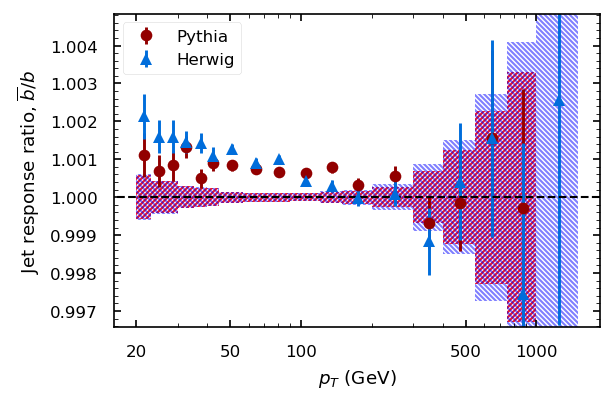

Fitting subsample:  _b
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_b_eta13to25_L5_double_ratio-median


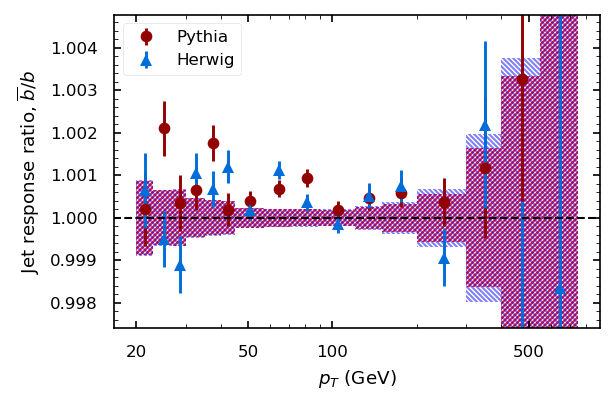

Fitting subsample:  _b
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_b_eta25to30_L5_double_ratio-median


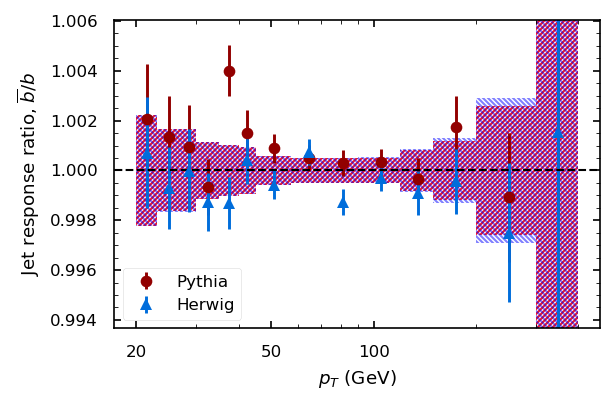

Fitting subsample:  _b
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_b_eta30to50_L5_double_ratio-median


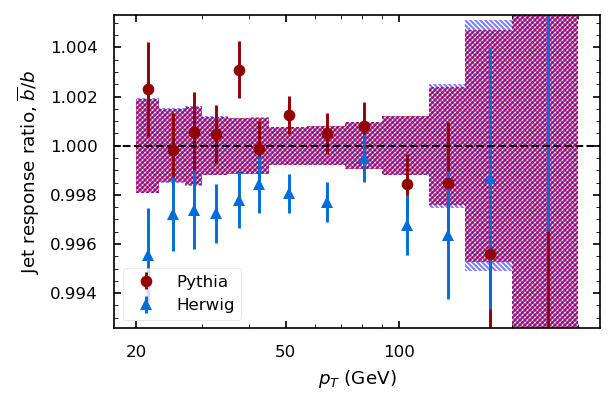

Fitting subsample:  _c
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_c_eta00to13_L5_double_ratio-median


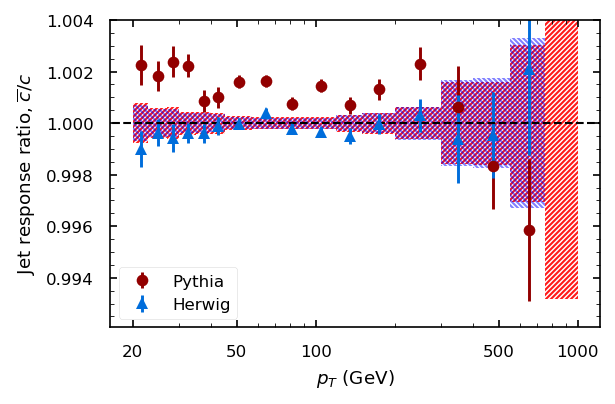

Fitting subsample:  _c
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_c_eta13to25_L5_double_ratio-median


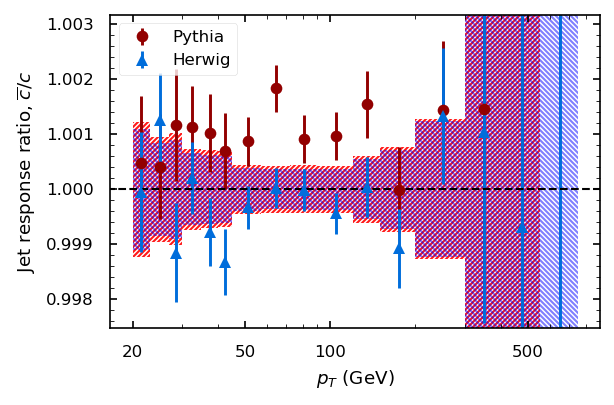

Fitting subsample:  _c
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_c_eta25to30_L5_double_ratio-median


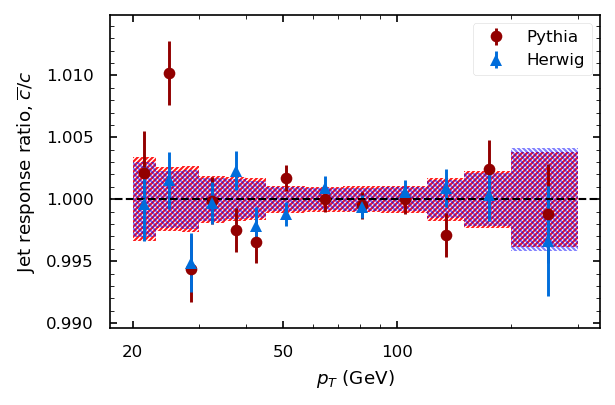

Fitting subsample:  _c
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_c_eta30to50_L5_double_ratio-median


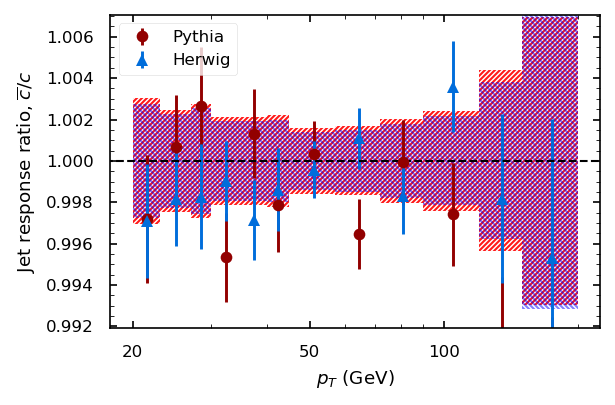

Fitting subsample:  _s
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_s_eta00to13_L5_double_ratio-median


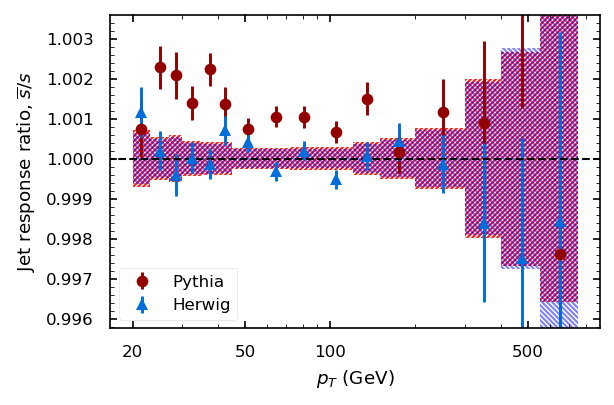

Fitting subsample:  _s
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_s_eta13to25_L5_double_ratio-median


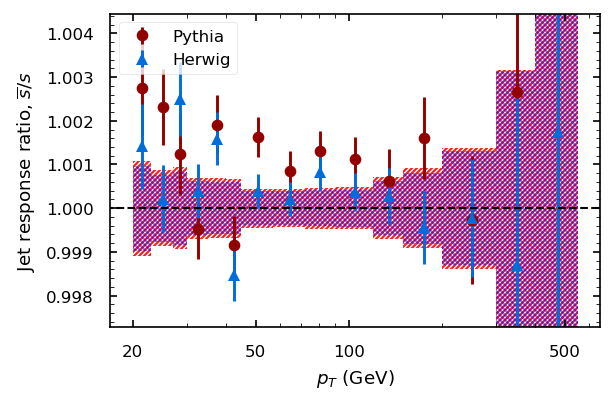

Fitting subsample:  _s
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_s_eta25to30_L5_double_ratio-median


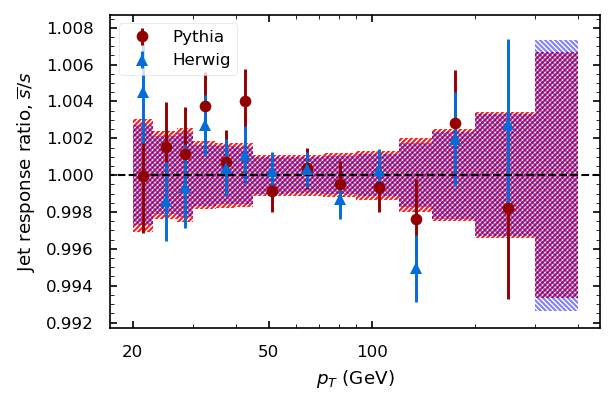

Fitting subsample:  _s
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_s_eta30to50_L5_double_ratio-median


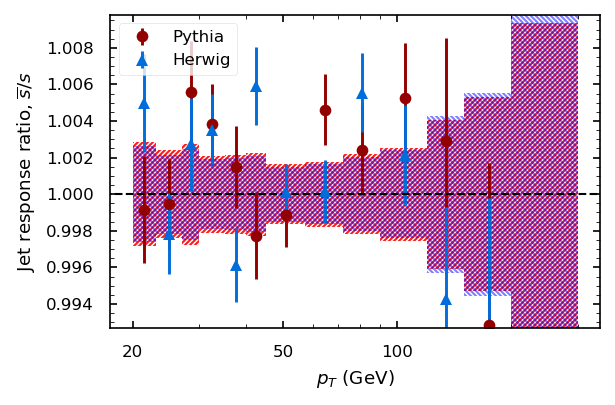

Fitting subsample:  _u
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_u_eta00to13_L5_double_ratio-median


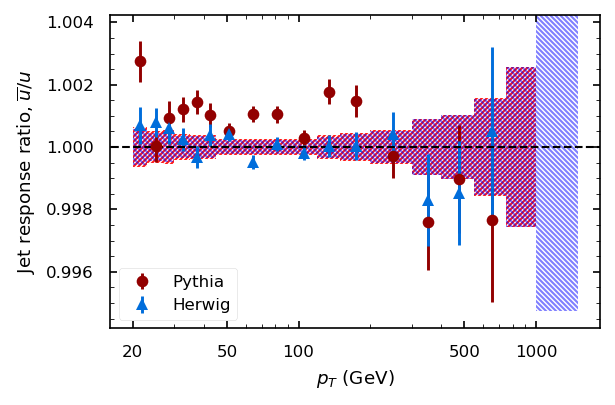

Fitting subsample:  _u
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_u_eta13to25_L5_double_ratio-median


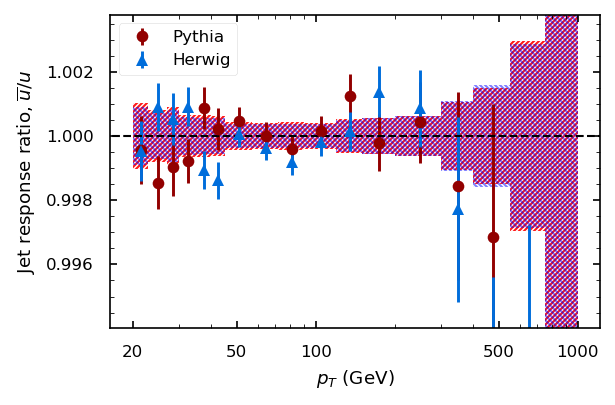

Fitting subsample:  _u
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_u_eta25to30_L5_double_ratio-median


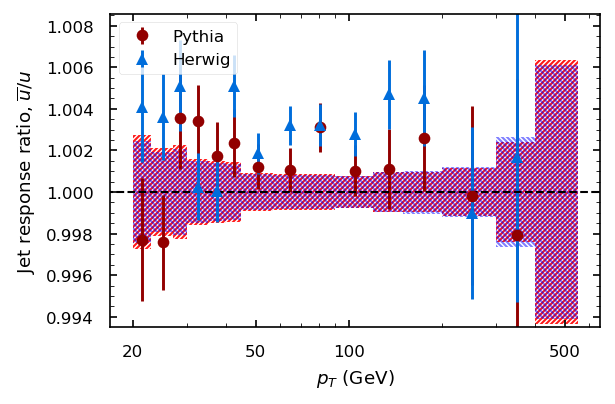

Fitting subsample:  _u
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_u_eta30to50_L5_double_ratio-median


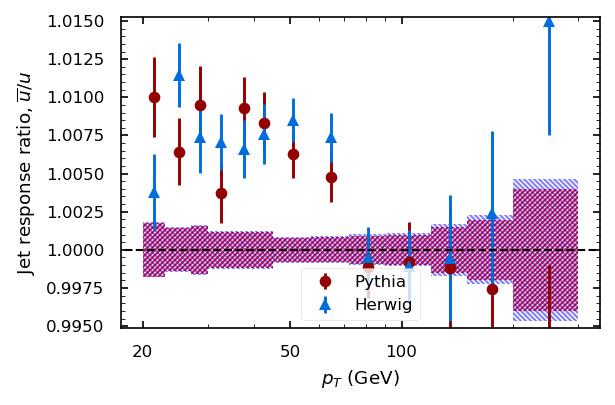

Fitting subsample:  _d
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_d_eta00to13_L5_double_ratio-median


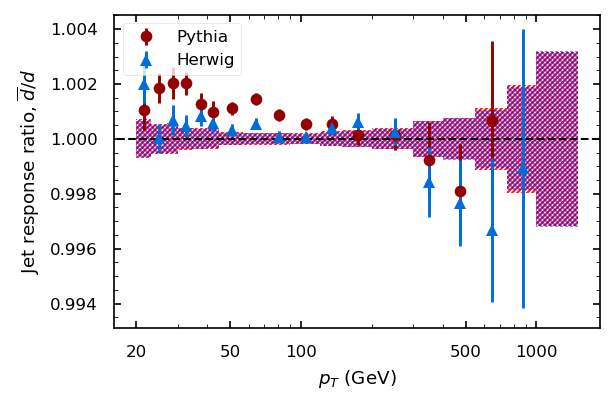

Fitting subsample:  _d
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_d_eta13to25_L5_double_ratio-median


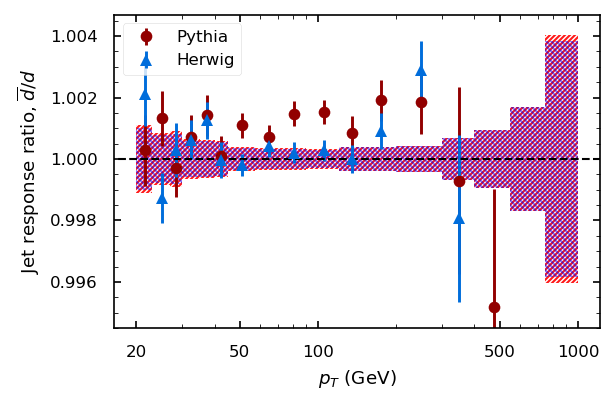

Fitting subsample:  _d
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_d_eta25to30_L5_double_ratio-median


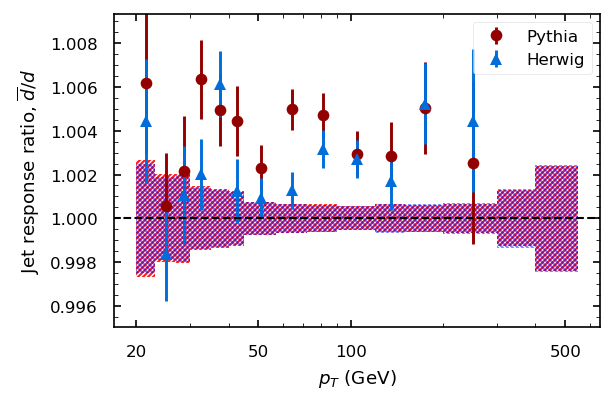

Fitting subsample:  _d
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_d_eta30to50_L5_double_ratio-median


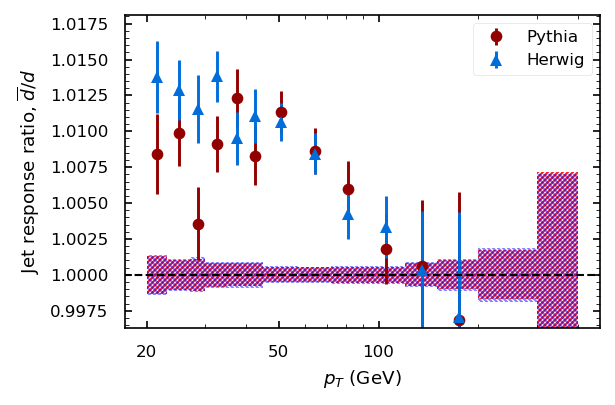

In [11]:
# load_fit_res=True
subsamples = ['_b', '_c', '_s', '_u', '_d']
# subsamples = ['_b']

k2 = np.where(etabins_mod<=0)[0][-1]
k4 = np.where(etabins_mod<=1.3)[0][-1]
k6 = np.where(etabins_mod<=2.5)[0][-1]
k8 = np.where(etabins_mod<=3.0)[0][-1]
ks = [k2, k4, k6, k8]

# ks = [k2, k4] #, k6, k8]
for samp in subsamples:
    for k in ks:
        print('Fitting subsample: ', samp)
        print('Eta: ', k)        
        
        make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME-100files', '_L5_LHEflav1_Herwig-TTBAR-JME-100files',
                                   k=k, samp=samp,
                                   ratio_name='Jet response ratio, $\overline{'+samp[1:]+'}/'+samp[1:]+'$')
                
3;

Fitting subsample:  _b
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_b_eta00to13_L5_double_ratio-median


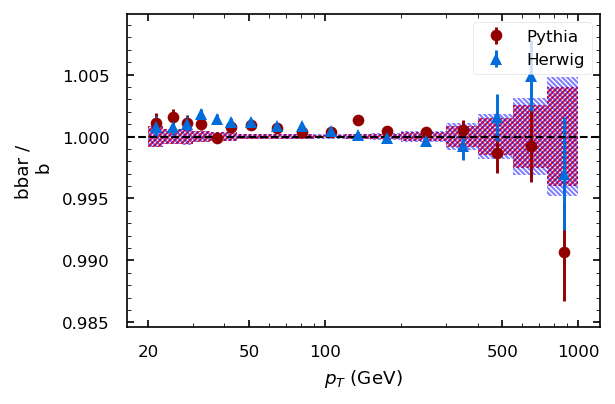

Fitting subsample:  _b
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_b_eta13to25_L5_double_ratio-median


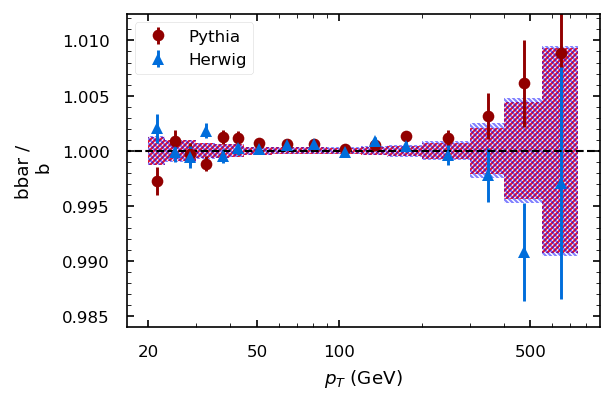

Fitting subsample:  _b
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_b_eta25to30_L5_double_ratio-median


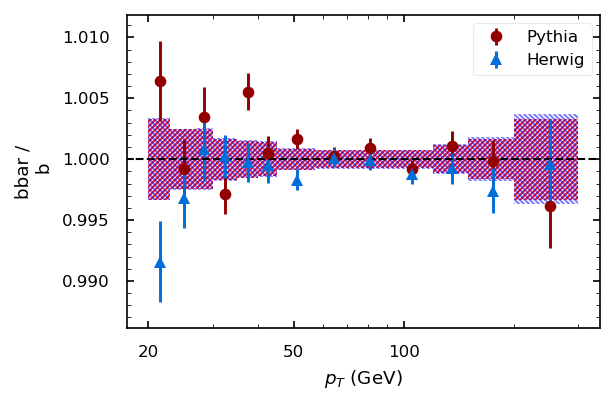

Fitting subsample:  _b
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_b_eta30to50_L5_double_ratio-median


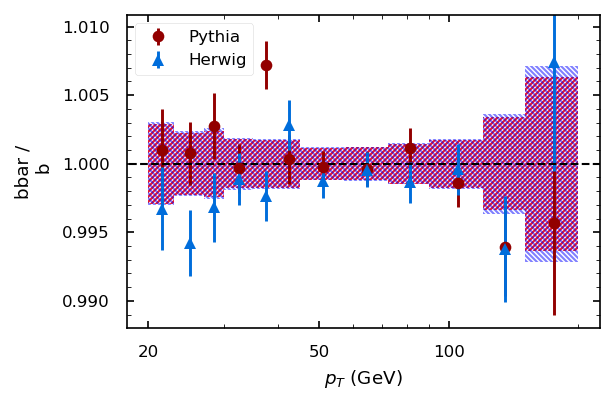

Fitting subsample:  _c
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_c_eta00to13_L5_double_ratio-median


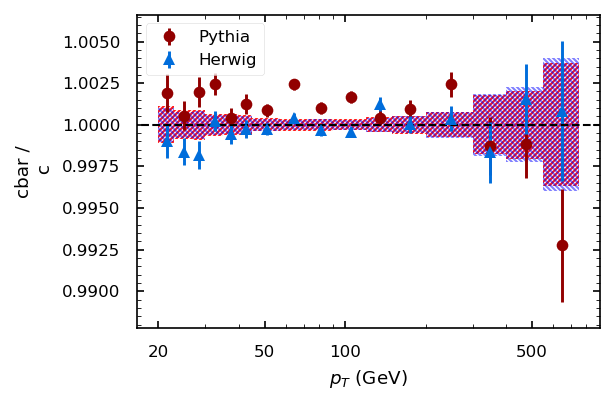

Fitting subsample:  _c
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_c_eta13to25_L5_double_ratio-median


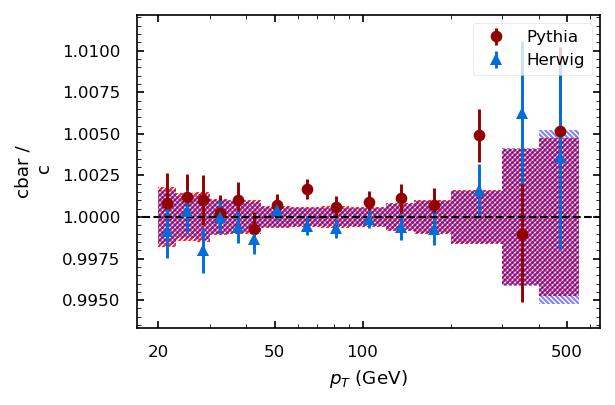

Fitting subsample:  _c
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_c_eta25to30_L5_double_ratio-median


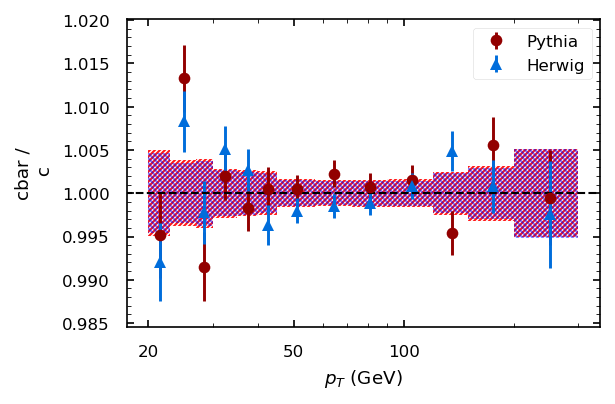

Fitting subsample:  _c
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_c_eta30to50_L5_double_ratio-median


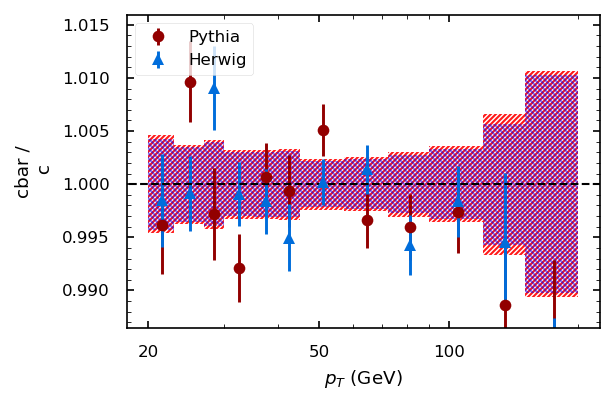

Fitting subsample:  _s
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_s_eta00to13_L5_double_ratio-median


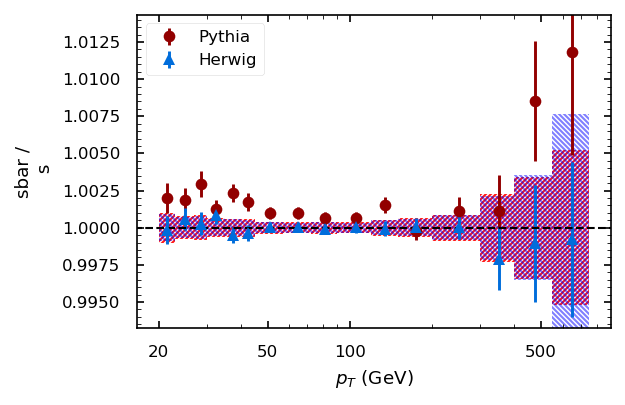

Fitting subsample:  _s
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_s_eta13to25_L5_double_ratio-median


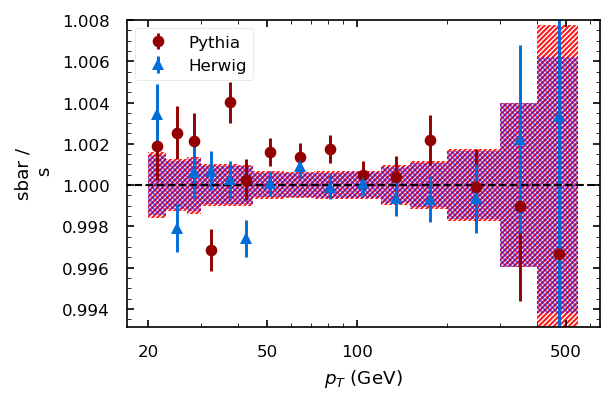

Fitting subsample:  _s
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_s_eta25to30_L5_double_ratio-median


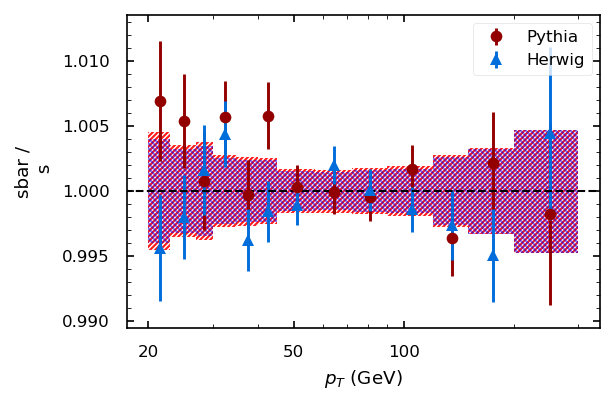

Fitting subsample:  _s
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_s_eta30to50_L5_double_ratio-median


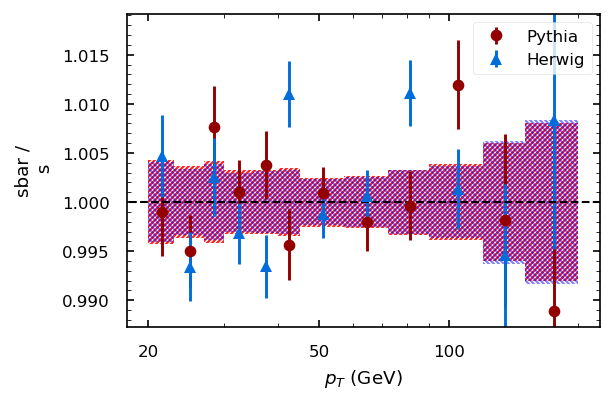

Fitting subsample:  _ud
Eta:  0
Saving plot for eta =  _eta00to13
Saving plot with the name =  fig/corr_vs_pt_ud_eta00to13_L5_double_ratio-median


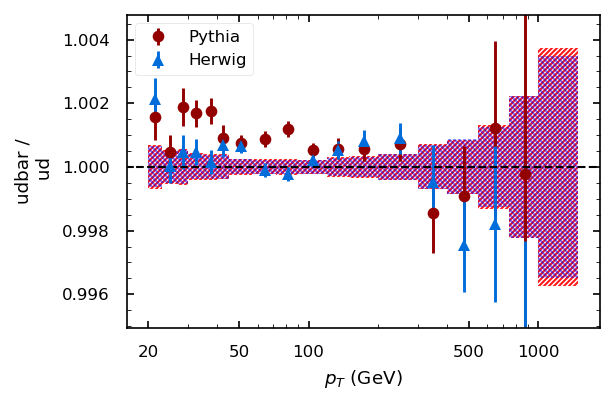

Fitting subsample:  _ud
Eta:  1
Saving plot for eta =  _eta13to25
Saving plot with the name =  fig/corr_vs_pt_ud_eta13to25_L5_double_ratio-median


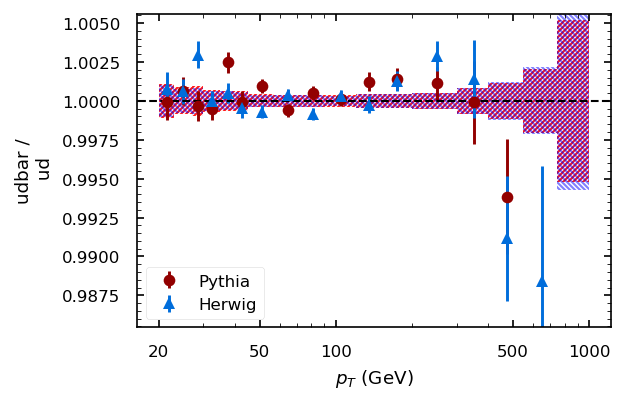

Fitting subsample:  _ud
Eta:  2
Saving plot for eta =  _eta25to30
Saving plot with the name =  fig/corr_vs_pt_ud_eta25to30_L5_double_ratio-median


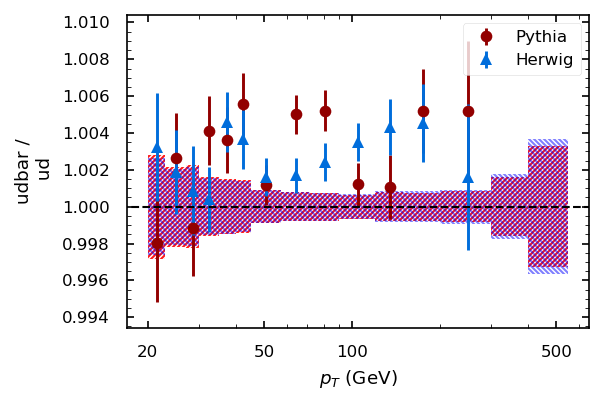

Fitting subsample:  _ud
Eta:  3
Saving plot for eta =  _eta30to50
Saving plot with the name =  fig/corr_vs_pt_ud_eta30to50_L5_double_ratio-median


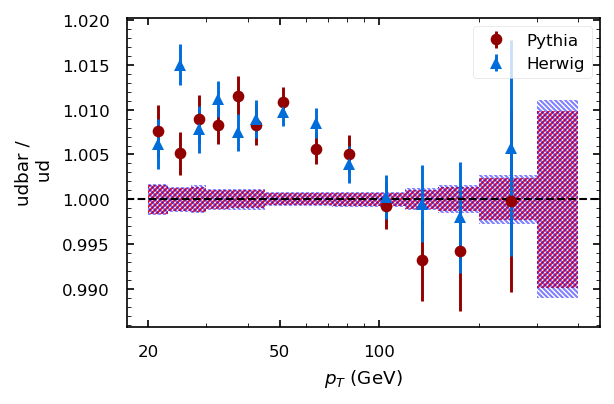

In [134]:
# load_fit_res=True
subsamples = ['_b', '_c', '_s', '_ud']
# subsamples = ['_g']

k2 = np.where(etabins_mod<=0)[0][-1]
k4 = np.where(etabins_mod<=1.3)[0][-1]
k6 = np.where(etabins_mod<=2.5)[0][-1]
k8 = np.where(etabins_mod<=3.0)[0][-1]
ks = [k2, k4, k6, k8]

# ks = [k2, k4] #, k6, k8]
for samp in subsamples:
    for k in ks:
        print('Fitting subsample: ', samp)
        print('Eta: ', k)        
        
        make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME', '_L5_LHEflav1_Herwig-TTBAR-JME',
                                   k=k, samp=samp,
                                   ratio_name=f'{samp[1:]}bar /\n {samp[1:]}')
                
3;